<a href="https://colab.research.google.com/github/OlumideF/MScFE_690_Capstone_Student_Group_7139/blob/main/MScFE_690_Capstone_Student_Group_7139_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MScFE Capstone Project Version 4 (Top 5 indexes in US and Asia)
## Student Group 7139
This version evaluated the top 5 indexes in the US and Asian Financial market and displayed normalized close price data to enhance comparison among indices


1.   Olumide Babatope Falana - falanaolumide@gmail.com
2.   Nathaniel Azubuike Nwogwu - nathanielnwogwu@yahoo.com
3.   Paul Akinyemi - akinyepa@clarkson.edu

## **Title: Assessment of the Long-Term Stock Market Volatility in US and Asian Markets: A GARCH and ARIMA-Based Analysis of Pre, During, and Post-COVID-19 Periods**
## *A casestudy of top 5 US and Asian indexes*
## Research Outline

# Library Installations

In [ ]:
pip install yfinance pandas numpy statsmodels arch scipy matplotlib scikit-learn


In [ ]:
!pip install ace_tools

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.stattools import adfuller  # For stationarity test

from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model  # For GARCH modeling
import itertools
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display

# Functions to call

In [ ]:
# 1.1 Identify and Collect Data Sources
def fetch_market_data(start_date, end_date, ticker_symbol):
    """
    Fetch historical market data for the given ticker symbol between start_date and end_date.
    """
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    return data

# 1.2 Data Cleaning and Preprocessing
def clean_data(df):
    """
    Cleans the data by handling missing values and standardizing formats.
    """
    # df.dropna(inplace=True)  # Remove missing values
    # df['Date'] = pd.to_datetime(df['Date'])  # Ensure the date column is in datetime format
    # df.set_index('Date', inplace=True)  # Set the date column as index
    return df

def detect_and_remove_outliers(df, threshold=3):
    """
    Detects and removes outliers using the Z-score method.
    """
    from scipy.stats import zscore
    df_no_outliers = df[(zscore(df) < threshold).all(axis=1)]
    return df_no_outliers

def normalize_data(df, method='zscore'):
    """
    Normalizes data using the specified method: 'zscore' or 'minmax'.
    """
    if method == 'zscore':
        return (df - df.mean()) / df.std()
    elif method == 'minmax':
        return (df - df.min()) / (df.max() - df.min())
    else:
        raise ValueError("Method should be either 'zscore' or 'minmax'")


# 1.3 Exploratory Data Analysis (EDA)
def plot_time_series(df, title='Time Series Data'):
    """
    Plots time series data.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def calculate_descriptive_stats(df):
    """
    Calculate and return descriptive statistics of the dataset.
    """
    return df.describe()

def test_stationarity(df, method='ADF'):
    """
    Tests for stationarity of the data using the Augmented Dickey-Fuller test.
    """
    result = adfuller(df['Close'])
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Values: {key}, {value}')
    return result[1]  # Return p-value


# 2.1 Building ARIMA Models
from statsmodels.tsa.arima.model import ARIMA
import itertools

def fit_arima_model(df, order=(1, 1, 1)):
    """
    Fits an ARIMA model to the time series data.
    """
    model = ARIMA(df['Close'], order=order)
    fitted_model = model.fit()
    print(fitted_model.summary())
    return fitted_model

def optimize_arima_params(df):
    """
    Optimizes ARIMA parameters using AIC.
    """
    p = d = q = range(0, 3)
    pdq_combinations = list(itertools.product(p, d, q))
    best_aic = float('inf')
    best_order = None

    for order in pdq_combinations:
        try:
            model = ARIMA(df['Close'], order=order)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
        except:
            continue

    print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")
    return best_order


# 2.2 Residual Analysis and Validation
def analyze_residuals(model):
    """
    Analyzes the residuals of a fitted ARIMA model.
    """
    residuals = model.resid
    plt.figure(figsize=(12, 6))
    plt.plot(residuals, label='Residuals')
    plt.title('Residuals of ARIMA Model')
    plt.show()
    return residuals

def plot_residuals(residuals):
    """
    Plots the residuals to check for patterns or heteroskedasticity.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(residuals, label='Residuals')
    plt.title('Residuals Analysis')
    plt.xlabel('Time')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show()


# 2.3 Applying GARCH Models for Volatility Analysis
def fit_garch_model(df, order=(1, 1)):
    """
    Applies a GARCH model to the residuals of the ARIMA model.
    """
    model = arch_model(df['Close'], vol='Garch', p=order[0], q=order[1])
    garch_model = model.fit(disp='off')
    print(garch_model.summary())
    return garch_model

def validate_garch_model(garch_model):
    """
    Validates the GARCH model by checking for ARCH effects.
    """
    test_arch = garch_model.hedgehog_plot()
    return test_arch


def clean_data(df):
    """
    Cleans the data by handling missing values and standardizing formats.
    """
    df_clean = df.copy()
    df_clean.dropna(inplace=True)  # Remove missing values
    df_clean['Date'] = pd.to_datetime(df_clean['Date'])  # Ensure the date column is in datetime format
    df_clean.set_index('Date', inplace=True)  # Set the date column as index
    return df_clean

# 3.1 Segmenting Data for Pre-Pandemic, Pandemic, and Post-Pandemic Analysis
def segment_data_by_period(df_clean, start_date, end_date):
    """
    Segments the data into specified periods.
    """
    segmented_data = df_clean[(df_clean.index >= start_date) & (df_clean.index <= end_date)]
    return segmented_data


# 3.2 Conducting Comparative Analysis
from scipy.stats import ttest_ind

def compare_volatility_across_periods(data_dict):
    """
    Compares market volatility across different periods.
    """
    volatilities = {period: data['Close'].pct_change().std() for period, data in data_dict.items()}
    print("Volatility comparison across periods:", volatilities)
    return volatilities

def perform_statistical_tests(data1, data2):
    """
    Performs statistical tests to determine significant differences in volatility.
    """
    t_stat, p_value = ttest_ind(data1['Close'].pct_change().dropna(), data2['Close'].pct_change().dropna())
    print(f'T-test results: t-statistic={t_stat}, p-value={p_value}')
    return p_value


# 4.1 Quantifying Volatility Changes
def calculate_volatility_change(pre_pandemic, pandemic, post_pandemic):
    """
    Calculates changes in volatility between pre-pandemic, pandemic, and post-pandemic periods.
    """
    volatility_pre = pre_pandemic['Close'].pct_change().std()
    volatility_pandemic = pandemic['Close'].pct_change().std()
    volatility_post = post_pandemic['Close'].pct_change().std()
    print(f'Pre-pandemic volatility: {volatility_pre}')
    print(f'Pandemic volatility: {volatility_pandemic}')
    print(f'Post-pandemic volatility: {volatility_post}')
    return volatility_pre, volatility_pandemic, volatility_post

def rolling_volatility_analysis(df, window_size=30):
    """
    Analyzes rolling volatility using a specified window size.
    """
    rolling_volatility = df['Close'].pct_change().rolling(window=window_size).std()
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, rolling_volatility, label='Rolling Volatility')
    plt.title('Rolling Volatility Analysis')
    plt.xlabel('Time')
    plt.ylabel('Volatility')
    plt.legend()
    plt.show()
    return rolling_volatility


# 5.1 Cross-Validation of Models
def cross_validate_arima_model(df, order, k_folds=5):
    """
    Performs cross-validation on ARIMA model using time-series data.

    """
    tscv = TimeSeriesSplit(n_splits=k_folds)
    errors = []

    for train_index, test_index in tscv.split(df):
        train, test = df.iloc[train_index], df.iloc[test_index]

        # Fit the ARIMA model on the training data
        model = ARIMA(train['Close'], order=order)
        fitted_model = model.fit()

        # Forecast on the test set
        predictions = fitted_model.forecast(steps=len(test))
        error = np.mean((predictions - test['Close']) ** 2)  # Mean Squared Error
        errors.append(error)

    mean_error = np.mean(errors)
    print("Cross-validation Mean Squared Error (MSE):", mean_error)
    return mean_error


def sensitivity_analysis_arima(df, base_order=(1, 1, 1), variations=[(-1, 0, 0), (0, -1, 0), (0, 0, -1)]):
    """
    Conducts sensitivity analysis on ARIMA model parameters.

    """
    results = {}
    p, d, q = base_order

    for variation in variations:
        var_order = (p + variation[0], d + variation[1], q + variation[2])
        try:
            model = ARIMA(df['Close'], order=var_order)
            fitted_model = model.fit()
            results[var_order] = {'AIC': fitted_model.aic, 'BIC': fitted_model.bic}
            print(f"Order {var_order} - AIC: {fitted_model.aic}, BIC: {fitted_model.bic}")
        except:
            print(f"Order {var_order} is not a valid model.")
            continue

    return results


# 5.2 Comparing Models' Performance
def compare_model_performance(models, metrics=['AIC', 'BIC', 'MSE']):
    """
    Compares different models' performance based on specified metrics.

    """
    performance = {metric: [] for metric in metrics}

    for model in models:
        # Handle ARIMA models
        if isinstance(model, ARIMA) or isinstance(model, ARIMA.ARIMAResultsWrapper):
            if 'AIC' in metrics:
                performance['AIC'].append(model.aic)
            if 'BIC' in metrics:
                performance['BIC'].append(model.bic)
            if 'MSE' in metrics:
                # Forecast for ARIMA models
                predictions = model.predict(start=0, end=len(model.data.endog)-1)
                mse = np.mean((predictions - model.data.endog) ** 2)
                performance['MSE'].append(mse)

        # Handle GARCH models
        elif hasattr(model, 'forecast'):
            if 'AIC' in metrics:
                performance['AIC'].append(model.aic)
            if 'BIC' in metrics:
                performance['BIC'].append(model.bic)
            if 'MSE' in metrics:
                # Forecast for GARCH models
                forecasts = model.forecast(horizon=1)
                predicted_variance = forecasts.variance.iloc[-1]  # Correct extraction
                actual_returns = model.model.resids[-len(predicted_variance):]
                mse = np.mean((predicted_variance.values - actual_returns ** 2) ** 2)
                performance['MSE'].append(mse)

    print("Model Performance Comparison:")
    for metric in metrics:
        print(f"{metric}: {performance[metric]}")

    return performance


# 6.1 Summarizing Findings
def generate_summary_statistics(df):
    """
    Generates summary statistics of the dataset.
    """
    summary = df.describe()
    print("Summary Statistics:", summary)
    return summary

def generate_report(df, models, insights):
    """
    Generate a comprehensive report summarizing the findings.
    """
    report = {
        'Data Summary': generate_summary_statistics(df),
        'Model Insights': {model_name: model.summary() for model_name, model in models.items()},
        'Key Insights': insights
    }
    return report

# 6.2 Visualizing Results
def visualize_results(data_dict):
    """
    Generates visual aids to communicate key findings.
    """
    for key, data in data_dict.items():
        plt.figure(figsize=(10, 5))
        plt.plot(data.index, data['Close'], label=f'{key} Close Prices')
        plt.title(f'{key} Period Close Prices')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()




# Market data

In [ ]:
# Define US and Asian Indexes Separately
us_indexes = {
    'S&P 500': '^GSPC',
    'NASDAQ': '^IXIC',
    'Dow Jones': '^DJI',
    'Russell 2000': '^RUT',
    'NYSE Composite': '^NYA'
}

asian_indexes = {
    'Nikkei 225': '^N225',
    'Shanghai Composite': '000001.SS',
    'Hang Seng': '^HSI',
    'KOSPI': '^KS11',
    'Nifty 50': '^NSEI'
}

# Fetching Data Separately
def fetch_all_market_data(index_dict, start_date, end_date):
    """
    Fetches historical data for all the indexes in the dictionary.
    """
    market_data = {}
    for name, ticker in index_dict.items():
        data = fetch_market_data(start_date, end_date, ticker)
        cleaned_data = data
        market_data[name] = cleaned_data
    return market_data

# Fetch US Market Data
us_market_data = fetch_all_market_data(us_indexes, '2019-01-01', '2024-09-01')

# Fetch Asian Market Data
asian_market_data = fetch_all_market_data(asian_indexes, '2019-01-01', '2024-09-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Descriptive Statistics of Selected Indexes in US and Asian Financial Market





Plotting US Stock Indexes:


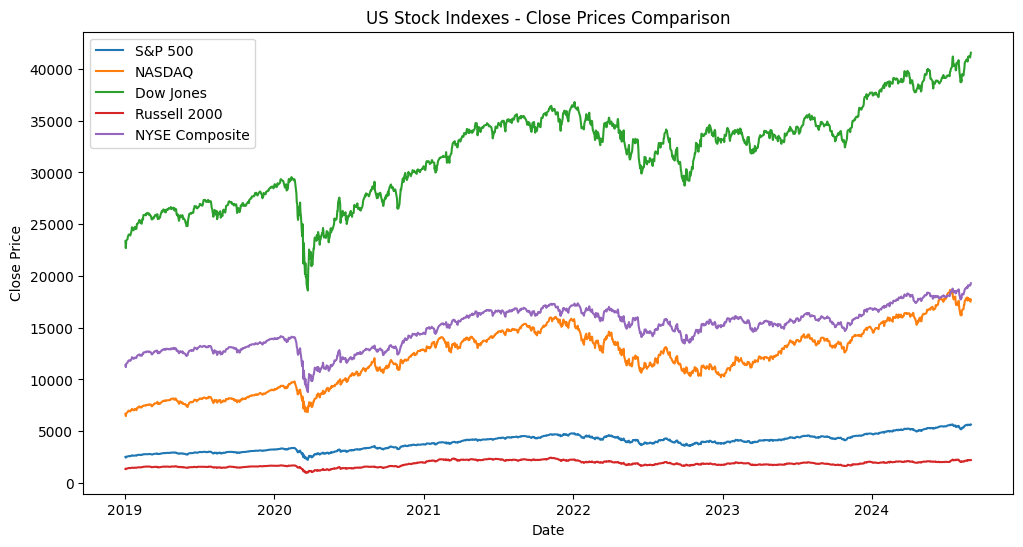

Plotting Asian Stock Indexes:


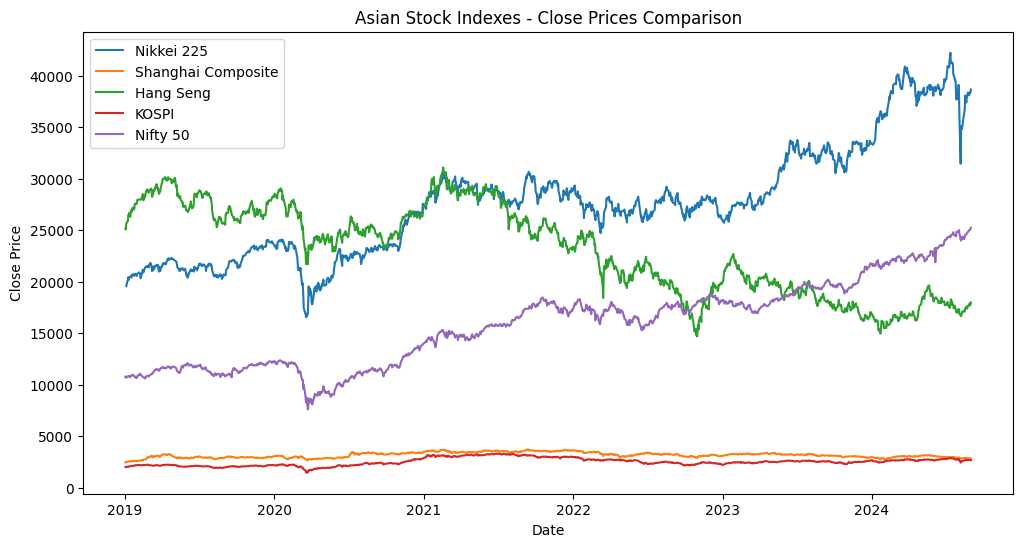

Plotting Normalized US Stock Indexes:


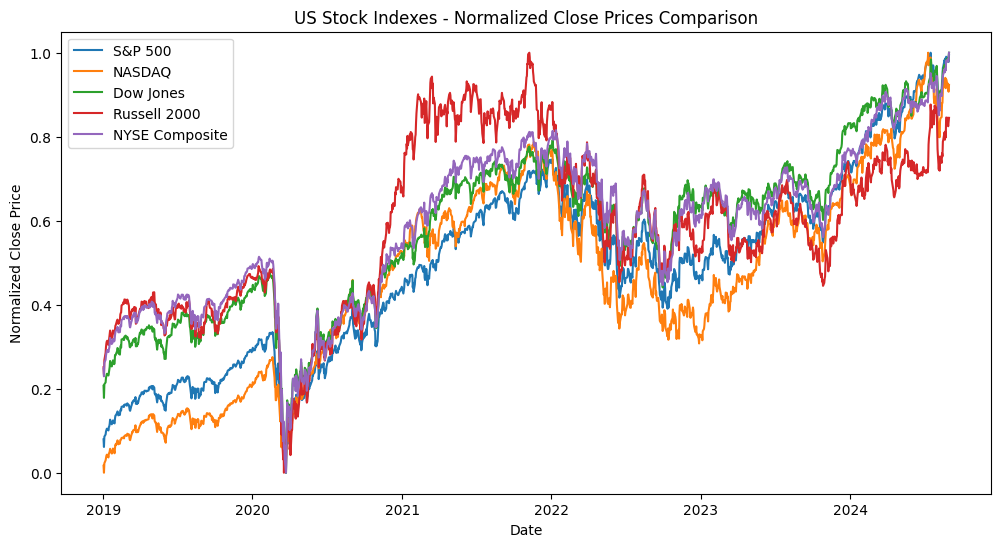

Plotting Normalized Asian Stock Indexes:


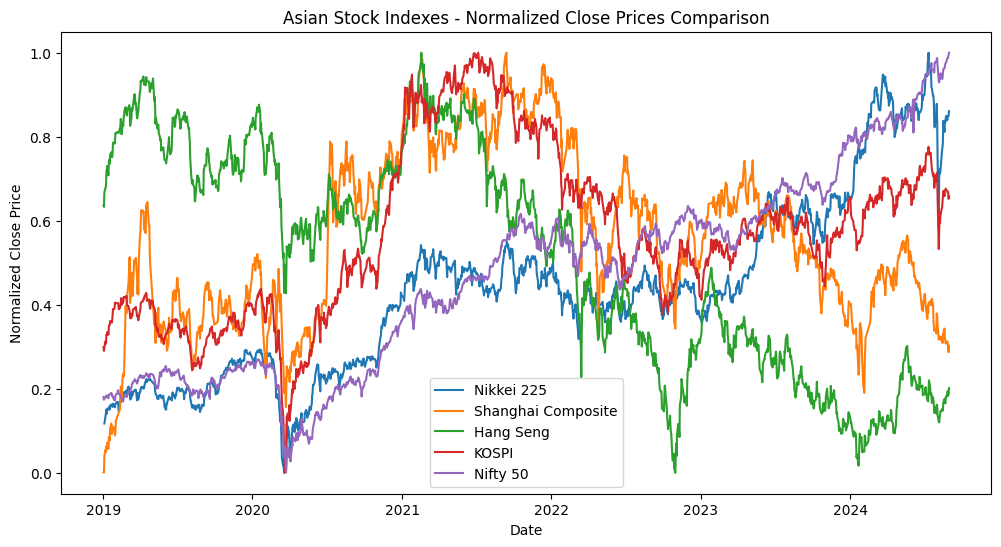

US Market Descriptive Statistics:
                                                 Mean Price  \
Index                                                         
S&P 500          Ticker
^GSPC    3928.664356
dtype: float64   
NASDAQ          Ticker
^IXIC    12128.838075
dtype: float64   
Dow Jones        Ticker
^DJI    31825.859046
dtype: float64   
Russell 2000      Ticker
^RUT    1836.304348
dtype: float64   
NYSE Composite   Ticker
^NYA    14959.917803
dtype: float64   

                                        Standard Deviation  \
Index                                                        
S&P 500          Ticker
^GSPC    765.346861
dtype: float64   
NASDAQ          Ticker
^IXIC    2877.211308
dtype: float64   
Dow Jones        Ticker
^DJI    4518.800128
dtype: float64   
Russell 2000      Ticker
^RUT    288.091382
dtype: float64   
NYSE Composite   Ticker
^NYA    1955.211578
dtype: float64   

                                   Volatility (Std Dev)  
Index                          

In [ ]:

# 1.1 Plot Grouped US Indexes
def plot_grouped_us_indexes(us_market_data):
    """
    Plots the closing prices of all US indexes in one chart.
    """
    plt.figure(figsize=(12, 6))
    for name, df in us_market_data.items():
        plt.plot(df.index, df['Close'], label=name)

    plt.title('US Stock Indexes - Close Prices Comparison')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# 1.2 Plot Grouped Asian Indexes
def plot_grouped_asian_indexes(asian_market_data):
    """
    Plots the closing prices of all Asian indexes in one chart.
    """
    plt.figure(figsize=(12, 6))
    for name, df in asian_market_data.items():
        plt.plot(df.index, df['Close'], label=name)

    plt.title('Asian Stock Indexes - Close Prices Comparison')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# 1.1.1 Plot Normalized US Indexes
def plot_normalized_us_indexes(us_market_data):
    """
    Plots the normalized closing prices of all US indexes in one chart.
    """
    plt.figure(figsize=(12, 6))
    for name, df in us_market_data.items():
        # Normalize Close prices
        normalized_close = (df['Close'] - df['Close'].min()) / (df['Close'].max() - df['Close'].min())
        plt.plot(df.index, normalized_close, label=name)

    plt.title('US Stock Indexes - Normalized Close Prices Comparison')
    plt.xlabel('Date')
    plt.ylabel('Normalized Close Price')
    plt.legend()
    plt.show()

# 1.1.2 Plot Normalized Asian Indexes
def plot_normalized_asian_indexes(asian_market_data):
    """
    Plots the normalized closing prices of all Asian indexes in one chart.
    """
    plt.figure(figsize=(12, 6))
    for name, df in asian_market_data.items():
        # Normalize Close prices
        normalized_close = (df['Close'] - df['Close'].min()) / (df['Close'].max() - df['Close'].min())
        plt.plot(df.index, normalized_close, label=name)

    plt.title('Asian Stock Indexes - Normalized Close Prices Comparison')
    plt.xlabel('Date')
    plt.ylabel('Normalized Close Price')
    plt.legend()
    plt.show()

# 2.1 Extract Descriptive Statistics into Separate DataFrames for US and Asian Markets
def extract_statistics_for_us_markets(us_market_data):
    """
    Extracts descriptive statistics (mean, std, volatility) for US indexes and returns as a DataFrame.
    """
    us_stats = []

    for name, df in us_market_data.items():
        stats = {
            'Index': name,
            'Mean Price': df['Close'].mean(),
            'Standard Deviation': df['Close'].std(),
            'Volatility (Std Dev)': df['Close'].pct_change().std()
        }
        us_stats.append(stats)

    us_df = pd.DataFrame(us_stats)
    us_df.set_index('Index', inplace=True)
    return us_df

def extract_statistics_for_asian_markets(asian_market_data):
    """
    Extracts descriptive statistics (mean, std, volatility) for Asian indexes and returns as a DataFrame.
    """
    asian_stats = []

    for name, df in asian_market_data.items():
        stats = {
            'Index': name,
            'Mean Price': df['Close'].mean(),
            'Standard Deviation': df['Close'].std(),
            'Volatility (Std Dev)': df['Close'].pct_change().std()
        }
        asian_stats.append(stats)

    asian_df = pd.DataFrame(asian_stats)
    asian_df.set_index('Index', inplace=True)
    return asian_df

# 3.1 Display Separate DataFrames for US and Asian Markets
def display_separate_market_dataframes(us_df, asian_df):
    """
    Displays the US and Asian DataFrames separately.
    """
    print("US Market Descriptive Statistics:")
    print(us_df)

    print("\nAsian Market Descriptive Statistics:")
    print(asian_df)

    return us_df, asian_df

# 4.1 Execute Grouping and Comparison
if __name__ == "__main__":
    # Plot grouped US indexes
    print("Plotting US Stock Indexes:")
    plot_grouped_us_indexes(us_market_data)

    # Plot grouped Asian indexes
    print("Plotting Asian Stock Indexes:")
    plot_grouped_asian_indexes(asian_market_data)

    # Plot normalized US indexes
    print("Plotting Normalized US Stock Indexes:")
    plot_normalized_us_indexes(us_market_data)

    # Plot normalized Asian indexes
    print("Plotting Normalized Asian Stock Indexes:")
    plot_normalized_asian_indexes(asian_market_data)

    # Extract statistics into separate DataFrames for US and Asian markets
    us_df = extract_statistics_for_us_markets(us_market_data)
    asian_df = extract_statistics_for_asian_markets(asian_market_data)

    # Display separate DataFrames for US and Asian markets
    display_separate_market_dataframes(us_df, asian_df)


In [ ]:
# @title
us_df

Mean Price  \
Index                                                         
S&P 500          Ticker
^GSPC    3928.664356
dtype: float64   
NASDAQ          Ticker
^IXIC    12128.838075
dtype: float64   
Dow Jones        Ticker
^DJI    31825.859046
dtype: float64   
Russell 2000      Ticker
^RUT    1836.304348
dtype: float64   
NYSE Composite   Ticker
^NYA    14959.917803
dtype: float64   

                                        Standard Deviation  \
Index                                                        
S&P 500          Ticker
^GSPC    765.346861
dtype: float64   
NASDAQ          Ticker
^IXIC    2877.211308
dtype: float64   
Dow Jones        Ticker
^DJI    4518.800128
dtype: float64   
Russell 2000      Ticker
^RUT    288.091382
dtype: float64   
NYSE Composite   Ticker
^NYA    1955.211578
dtype: float64   

                                   Volatility (Std Dev)  
Index                                                    
S&P 500         Ticker
^GSPC    0.012905
dtype: float64  
NASDAQ           Ticker
^IXIC    0.01539
dtype: float64  
Dow Jones         Ticker
^DJI    0.01259
dtype: float64  
Russell 2000     Ticker
^RUT    0.016792
dtype: float64  
NYSE Composite   Ticker
^NYA    0.012293
dtype: float64

In [ ]:
asian_df

Mean Price  \
Index                                                                
Nikkei 225             Ticker
^N225    27690.759238
dtype: float64   
Shanghai Composite  Ticker
000001.SS    3171.889527
dtype: float64   
Hang Seng               Ticker
^HSI    23095.059449
dtype: float64   
KOSPI                   Ticker
^KS11    2513.984555
dtype: float64   
Nifty 50               Ticker
^NSEI    15886.428749
dtype: float64   

                                               Standard Deviation  \
Index                                                               
Nikkei 225             Ticker
^N225    5350.206596
dtype: float64   
Shanghai Composite  Ticker
000001.SS    252.069906
dtype: float64   
Hang Seng               Ticker
^HSI    4297.465873
dtype: float64   
KOSPI                   Ticker
^KS11    370.160059
dtype: float64   
Nifty 50               Ticker
^NSEI    4039.594257
dtype: float64   

                                           Volatility (Std Dev)  
Index                                                            
Nikkei 225               Ticker
^N225    0.01298
dtype: float64  
Shanghai Composite  Ticker
000001.SS    0.010403
dtype: float64  
Hang Seng                Ticker
^HSI    0.014666
dtype: float64  
KOSPI                   Ticker
^KS11    0.012065
dtype: float64  
Nifty 50                Ticker
^NSEI    0.011745
dtype: float64

# Comprehensive Analysis

US Markets Analysis:
Analyzing S&P 500:


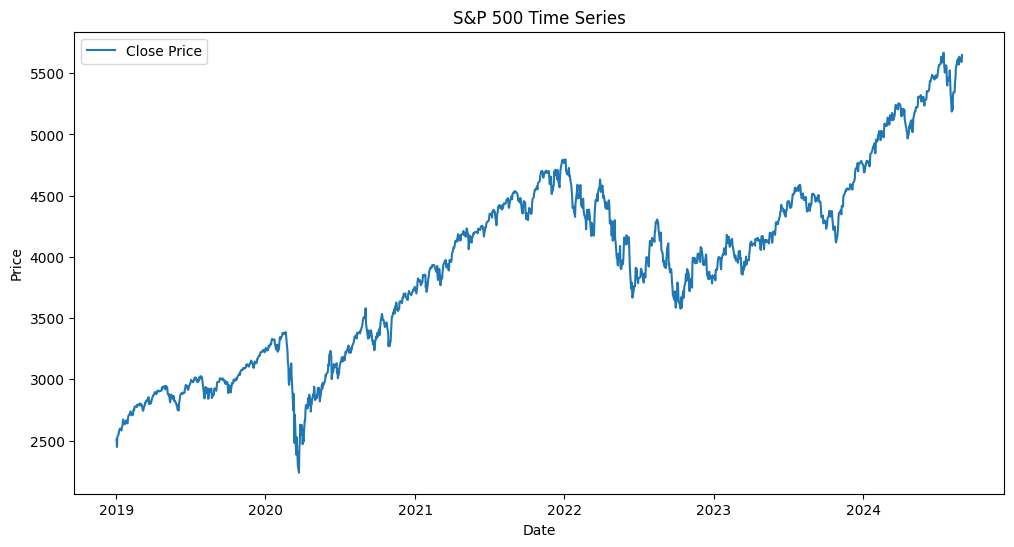

S&P 500 Descriptive Stats:
 Price     Adj Close        Close         High          Low         Open  \
Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
count   1426.000000  1426.000000  1426.000000  1426.000000  1426.000000   
mean    3928.664356  3928.664356  3950.509778  3903.671465  3927.648615   
std      765.346861   765.346861   766.815703   764.161839   765.334974   
min     2237.399902  2237.399902  2300.729980  2191.860107  2290.709961   
25%     3235.974915  3235.974915  3246.877563  3216.269958  3228.354980   
50%     3996.330078  3996.330078  4028.570068  3966.314941  3998.969971   
75%     4449.984863  4449.984863  4467.867554  4429.580078  4448.762573   
max     5667.200195  5667.200195  5669.669922  5639.020020  5644.089844   

Price         Volume  
Ticker         ^GSPC  
count   1.426000e+03  
mean    4.259270e+09  
std     1.033368e+09  
min     1.296530e+09  
25%     3.645455e+09  
50%     4.009320e+09  
75%     4.606358e+09  
max     9.9765

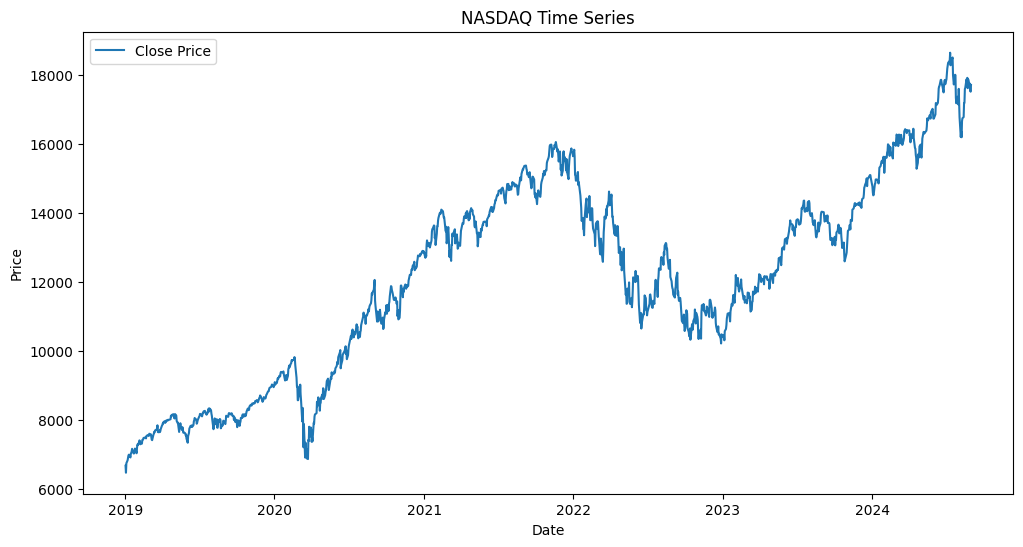

NASDAQ Descriptive Stats:
 Price      Adj Close         Close          High           Low          Open  \
Ticker         ^IXIC         ^IXIC         ^IXIC         ^IXIC         ^IXIC   
count    1426.000000   1426.000000   1426.000000   1426.000000   1426.000000   
mean    12128.838075  12128.838075  12215.244063  12030.168587  12126.109867   
std      2877.211308   2877.211308   2891.943104   2863.023617   2880.493231   
min      6463.500000   6463.500000   6600.209961   6457.129883   6506.910156   
25%      9725.974854   9725.974854   9750.257812   9640.210205   9704.657471   
50%     12246.165039  12246.165039  12295.155273  12171.669922  12233.119629   
75%     14203.122559  14203.122559  14288.315186  14120.300049  14203.339844   
max     18647.449219  18647.449219  18671.070312  18467.580078  18659.250000   

Price         Volume  
Ticker         ^IXIC  
count   1.426000e+03  
mean    4.387558e+09  
std     1.453186e+09  
min     1.014530e+09  
25%     3.702872e+09  
50%     4.5

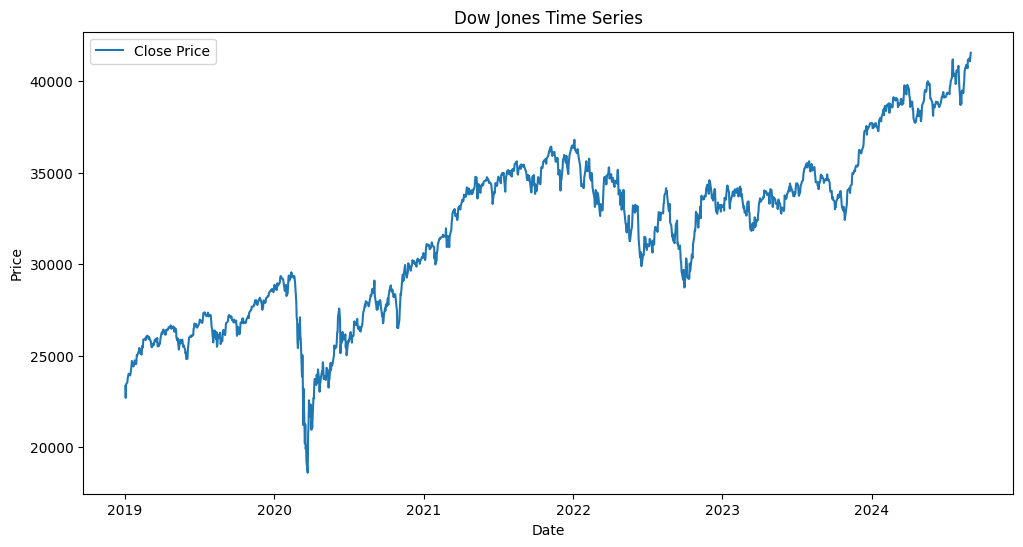

Dow Jones Descriptive Stats:
 Price      Adj Close         Close          High           Low          Open  \
Ticker          ^DJI          ^DJI          ^DJI          ^DJI          ^DJI   
count    1426.000000   1426.000000   1426.000000   1426.000000   1426.000000   
mean    31825.859046  31825.859046  32001.194495  31630.065463  31819.035421   
std      4518.800128   4518.800128   4508.911185   4529.668009   4516.795481   
min     18591.929688  18591.929688  19121.009766  18213.650391  19028.359375   
25%     27691.490234  27691.490234  27868.852051  27566.843262  27713.468262   
50%     32961.345703  32961.345703  33174.074219  32791.310547  32996.105469   
75%     34765.508789  34765.508789  34942.219727  34577.570312  34748.554688   
max     41563.078125  41563.078125  41585.210938  41145.851562  41366.160156   

Price         Volume  
Ticker          ^DJI  
count   1.426000e+03  
mean    3.442604e+08  
std     1.034248e+08  
min     8.615000e+07  
25%     2.819675e+08  
50%     

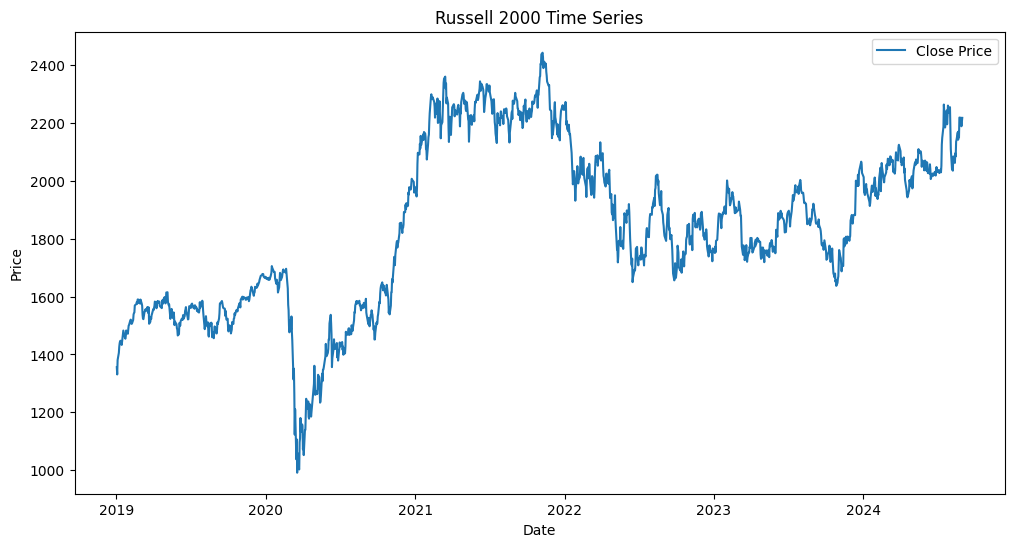

Russell 2000 Descriptive Stats:
 Price     Adj Close        Close         High          Low         Open  \
Ticker         ^RUT         ^RUT         ^RUT         ^RUT         ^RUT   
count   1426.000000  1426.000000  1426.000000  1426.000000  1426.000000   
mean    1836.304348  1836.304348  1851.474930  1820.038920  1836.198814   
std      288.091382   288.091382   289.382748   286.916564   288.025174   
min      991.159973   991.159973  1017.890015   966.219971   988.710022   
25%     1584.119965  1584.119965  1591.445038  1575.097473  1584.220001   
50%     1839.130005  1839.130005  1852.945007  1821.284973  1838.825012   
75%     2056.477600  2056.477600  2072.787476  2040.415039  2054.197510   
max     2442.739990  2442.739990  2458.860107  2438.060059  2442.219971   

Price         Volume  
Ticker          ^RUT  
count   1.426000e+03  
mean    4.254095e+09  
std     1.045374e+09  
min     0.000000e+00  
25%     3.642428e+09  
50%     4.009320e+09  
75%     4.606358e+09  
max     9

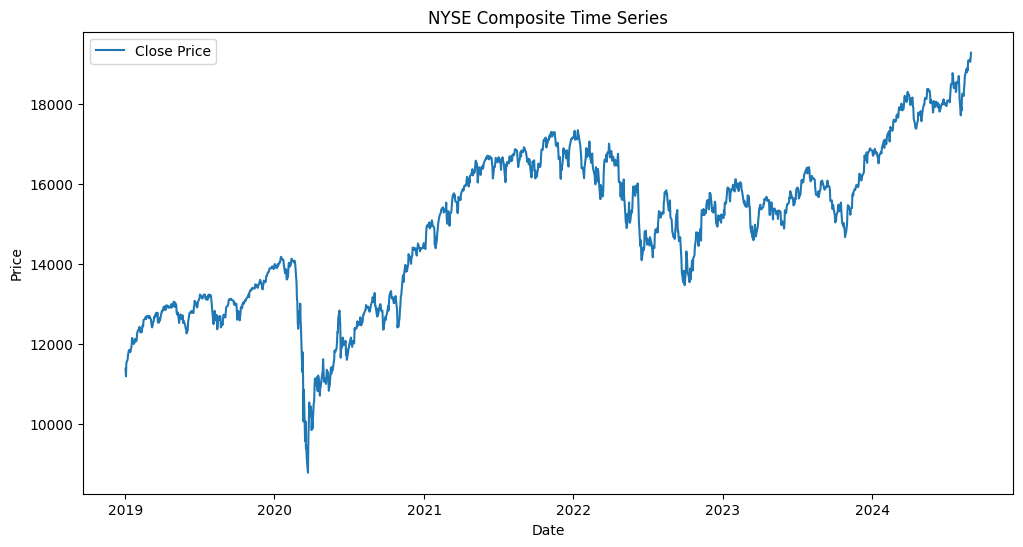

NYSE Composite Descriptive Stats:
 Price      Adj Close         Close          High           Low          Open  \
Ticker          ^NYA          ^NYA          ^NYA          ^NYA          ^NYA   
count    1426.000000   1426.000000   1426.000000   1426.000000   1426.000000   
mean    14959.917803  14959.917803  15042.644917  14867.654913  14956.885453   
std      1955.211578   1955.211578   1953.319715   1956.188304   1950.801784   
min      8777.379883   8777.379883   9053.490234   8664.940430   9014.580078   
25%     13138.727539  13138.727539  13197.142090  13094.145264  13135.282227   
50%     15316.484863  15316.484863  15401.450195  15212.470215  15316.325195   
75%     16466.155762  16466.155762  16563.790527  16363.192383  16465.665039   
max     19292.230469  19292.230469  19298.029297  19088.490234  19149.539062   

Price         Volume  
Ticker          ^NYA  
count   1.426000e+03  
mean    4.259270e+09  
std     1.033368e+09  
min     1.296530e+09  
25%     3.645455e+09  
50%

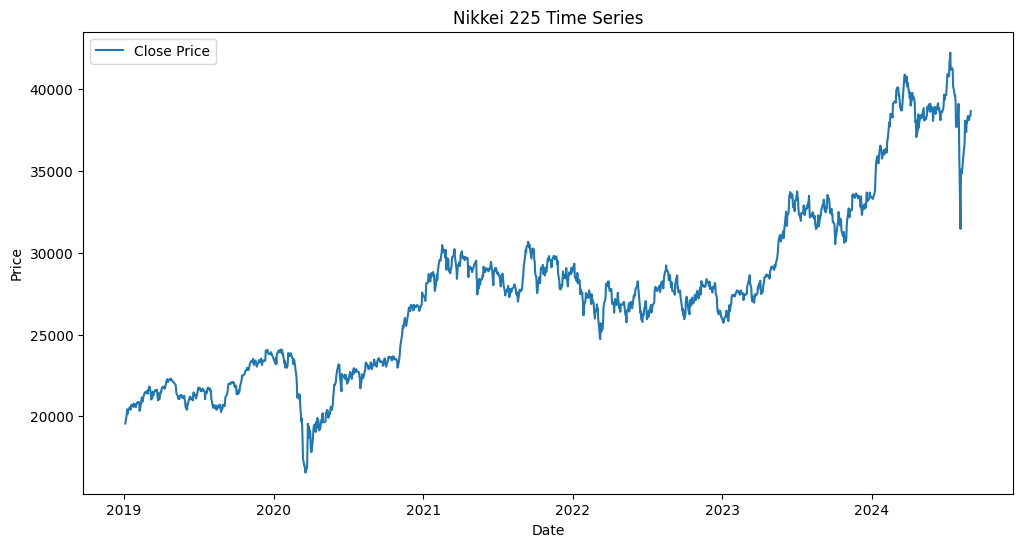

Nikkei 225 Descriptive Stats:
 Price      Adj Close         Close          High           Low          Open  \
Ticker         ^N225         ^N225         ^N225         ^N225         ^N225   
count    1381.000000   1381.000000   1381.000000   1381.000000   1381.000000   
mean    27690.759238  27690.759238  27838.724465  27527.232812  27685.739424   
std      5350.206596   5350.206596   5384.104433   5317.227585   5344.005256   
min     16552.830078  16552.830078  17049.029297  16358.190430  16570.570312   
25%     23215.710938  23215.710938  23340.769531  23129.660156  23231.140625   
50%     27584.349609  27584.349609  27713.039062  27444.130859  27581.240234   
75%     29839.710938  29839.710938  30048.230469  29718.779297  29874.429688   
max     42224.019531  42224.019531  42426.769531  42102.460938  42343.718750   

Price         Volume  
Ticker         ^N225  
count   1.381000e+03  
mean    8.054620e+07  
std     2.833279e+07  
min     0.000000e+00  
25%     6.160000e+07  
50%    

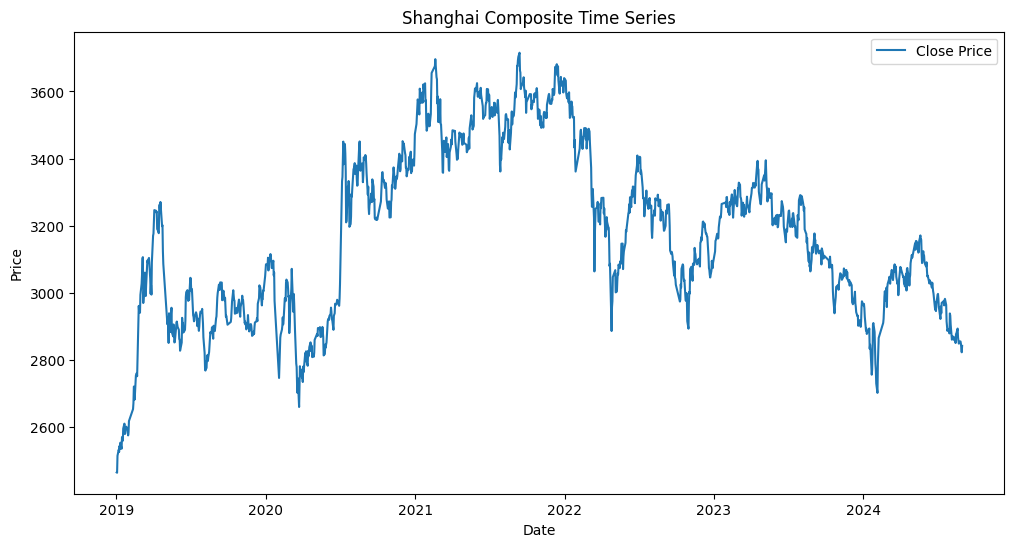

Shanghai Composite Descriptive Stats:
 Price     Adj Close        Close         High          Low         Open  \
Ticker    000001.SS    000001.SS    000001.SS    000001.SS    000001.SS   
count   1374.000000  1374.000000  1374.000000  1374.000000  1374.000000   
mean    3171.889527  3171.889527  3189.536334  3150.478986  3169.866959   
std      252.069906   252.069906   252.761355   250.902430   252.821630   
min     2464.363037  2464.363037  2488.479004  2440.906982  2446.019043   
25%     2974.122986  2974.122986  2989.021240  2955.366943  2969.113403   
50%     3158.310059  3158.310059  3177.425049  3142.714478  3160.145020   
75%     3361.572571  3361.572571  3384.575928  3336.352905  3363.115540   
max     3715.370117  3715.370117  3731.687012  3692.820068  3721.086914   

Price          Volume  
Ticker      000001.SS  
count     1374.000000  
mean    301402.547307  
std      90820.444745  
min        100.000000  
25%     243850.000000  
50%     297400.000000  
75%     354100.000

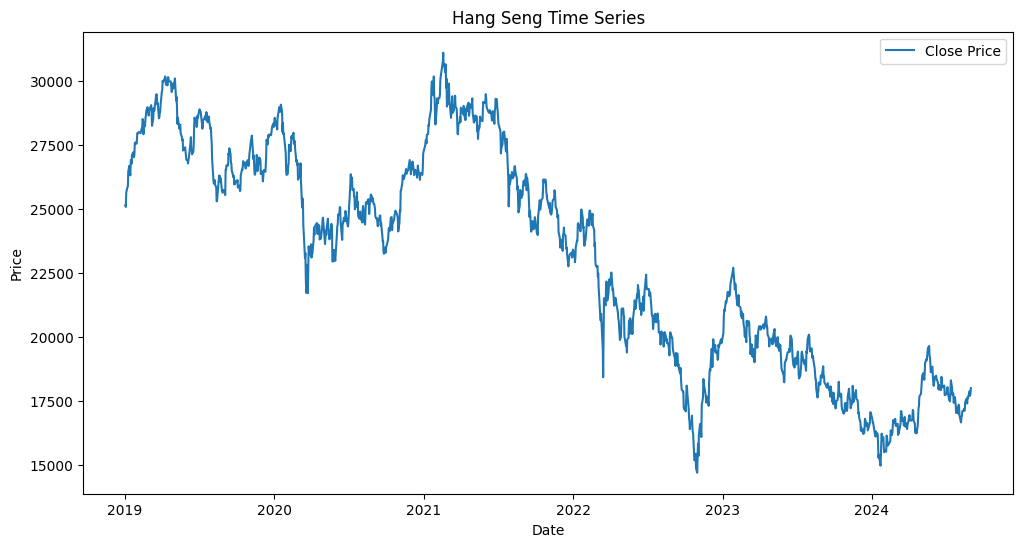

Hang Seng Descriptive Stats:
 Price      Adj Close         Close          High           Low          Open  \
Ticker          ^HSI          ^HSI          ^HSI          ^HSI          ^HSI   
count    1395.000000   1395.000000   1395.000000   1395.000000   1395.000000   
mean    23095.059449  23095.059449  23266.542787  22915.496839  23107.130907   
std      4297.465873   4297.465873   4295.972808   4287.560980   4302.027895   
min     14687.019531  14687.019531  15113.150391  14597.309570  14830.690430   
25%     19211.129883  19211.129883  19371.255859  19053.009766  19207.759766   
50%     23983.660156  23983.660156  24191.320312  23812.349609  24025.449219   
75%     26741.309570  26741.309570  26860.075195  26604.290039  26765.305664   
max     31084.939453  31084.939453  31183.359375  30570.550781  31183.359375   

Price         Volume  
Ticker          ^HSI  
count   1.395000e+03  
mean    2.235506e+09  
std     8.039324e+08  
min     0.000000e+00  
25%     1.716280e+09  
50%     

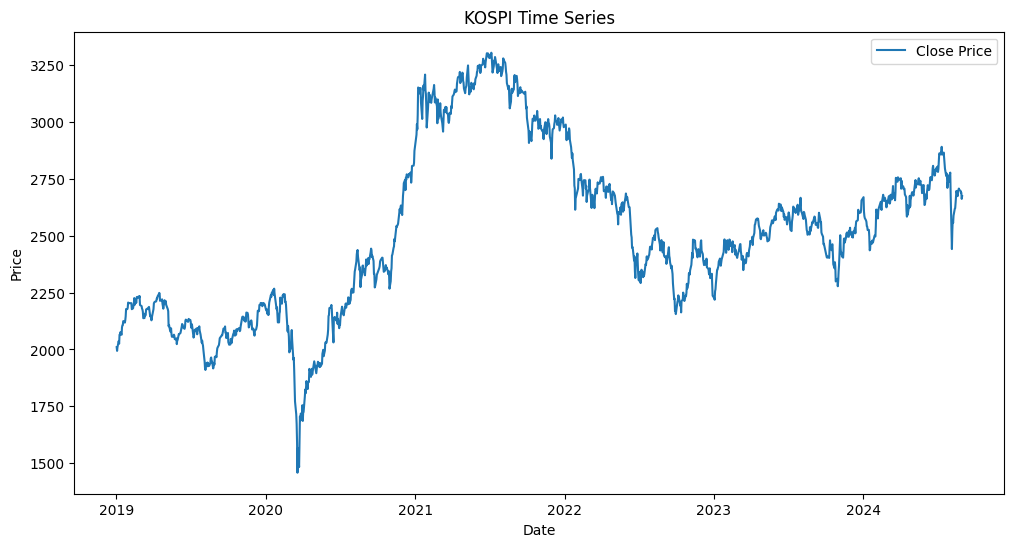

KOSPI Descriptive Stats:
 Price     Adj Close        Close         High          Low         Open  \
Ticker        ^KS11        ^KS11        ^KS11        ^KS11        ^KS11   
count   1396.000000  1396.000000  1396.000000  1396.000000  1396.000000   
mean    2513.984555  2513.984555  2528.887063  2498.790640  2515.401330   
std      370.160059   370.160059   371.533808   369.213131   370.526593   
min     1457.640015  1457.640015  1516.750000  1439.430054  1474.449951   
25%     2208.292419  2208.292419  2219.372559  2194.787537  2208.902466   
50%     2486.270020  2486.270020  2498.455078  2472.390015  2487.175049   
75%     2729.754944  2729.754944  2742.972534  2712.210022  2730.065063   
max     3305.209961  3305.209961  3316.080078  3295.439941  3305.459961   

Price         Volume  
Ticker         ^KS11  
count   1.396000e+03  
mean    6.848501e+05  
std     3.406374e+05  
min     2.575000e+05  
25%     4.468250e+05  
50%     5.863000e+05  
75%     8.179250e+05  
max     3.455500

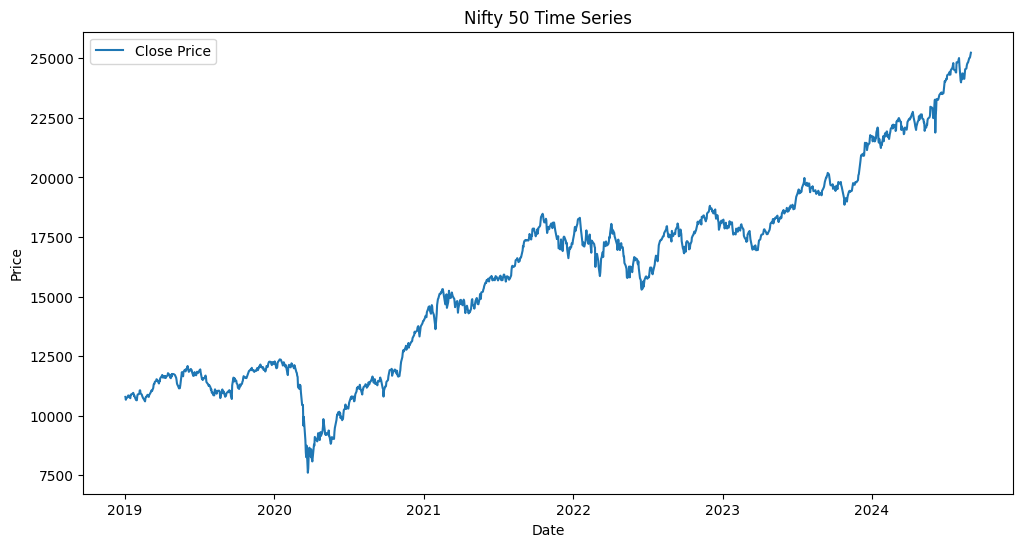

Nifty 50 Descriptive Stats:
 Price      Adj Close         Close          High           Low          Open  \
Ticker         ^NSEI         ^NSEI         ^NSEI         ^NSEI         ^NSEI   
count    1395.000000   1395.000000   1395.000000   1395.000000   1395.000000   
mean    15886.428749  15886.428749  15972.194693  15793.213209  15896.385841   
std      4039.594257   4039.594257   4041.651212   4031.957073   4036.945229   
min      7610.250000   7610.250000   8036.950195   7511.100098   7735.149902   
25%     11852.174805  11852.174805  11926.300293  11797.800293  11870.625000   
50%     16496.449219  16496.449219  16589.400391  16376.299805  16481.599609   
75%     18268.700195  18268.700195  18343.474609  18202.525391  18295.325195   
max     25235.900391  25235.900391  25268.349609  25199.400391  25249.699219   

Price         Volume  
Ticker         ^NSEI  
count   1.395000e+03  
mean    4.091995e+05  
std     2.108346e+05  
min     0.000000e+00  
25%     2.600500e+05  
50%     3

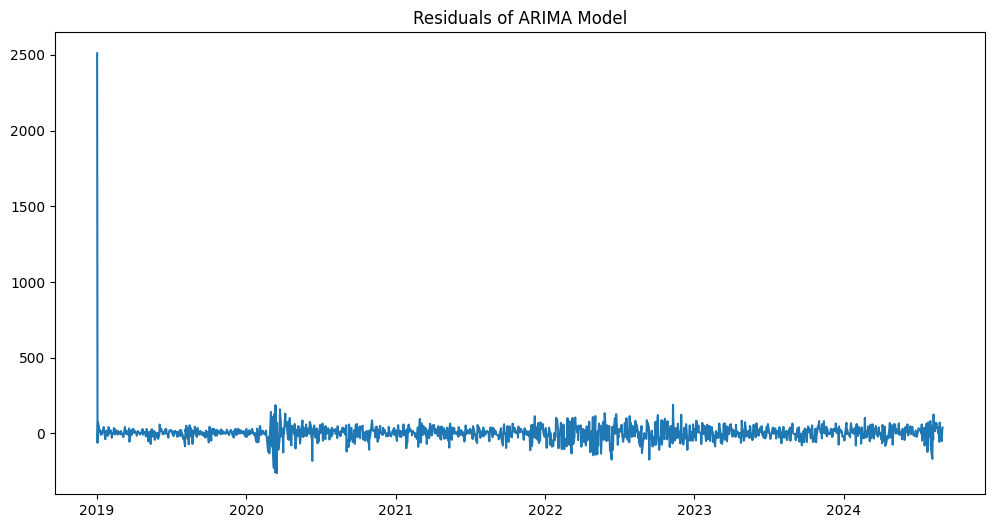

Fitting ARIMA model to NASDAQ:
Best ARIMA order: (2, 1, 2) with AIC: 18748.811348244555
                               SARIMAX Results                                
Dep. Variable:                  ^IXIC   No. Observations:                 1426
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9369.406
Date:                Mon, 18 Nov 2024   AIC                          18748.811
Time:                        05:53:39   BIC                          18775.121
Sample:                             0   HQIC                         18758.638
                               - 1426                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7081      0.036    -47.684      0.000      -1.778      -1.638
ar.L2         -0.9096      0.032    -28.172

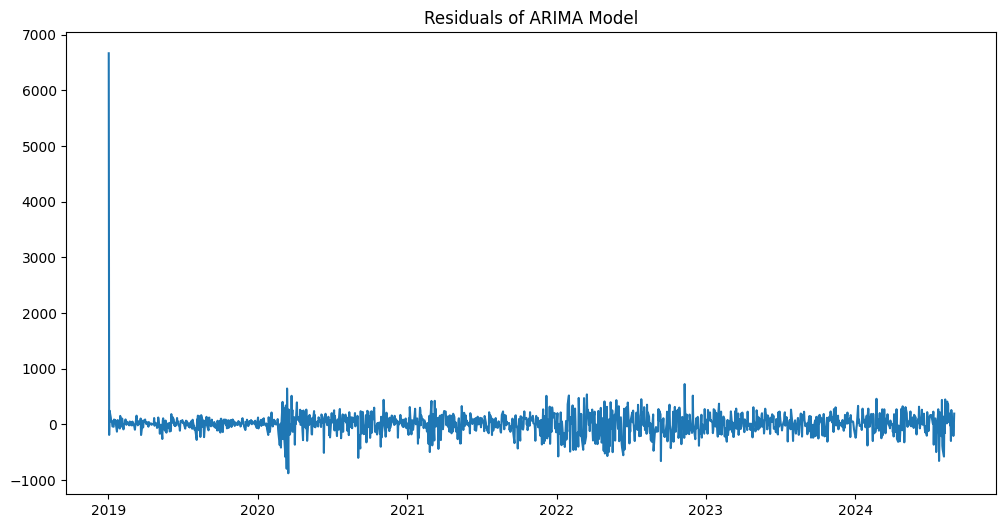

Fitting ARIMA model to Dow Jones:
Best ARIMA order: (2, 1, 2) with AIC: 20635.580556590325
                               SARIMAX Results                                
Dep. Variable:                   ^DJI   No. Observations:                 1426
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10312.790
Date:                Mon, 18 Nov 2024   AIC                          20635.581
Time:                        05:53:59   BIC                          20661.890
Sample:                             0   HQIC                         20645.407
                               - 1426                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7371      0.023    -76.285      0.000      -1.782      -1.692
ar.L2         -0.8794      0.021    -42.

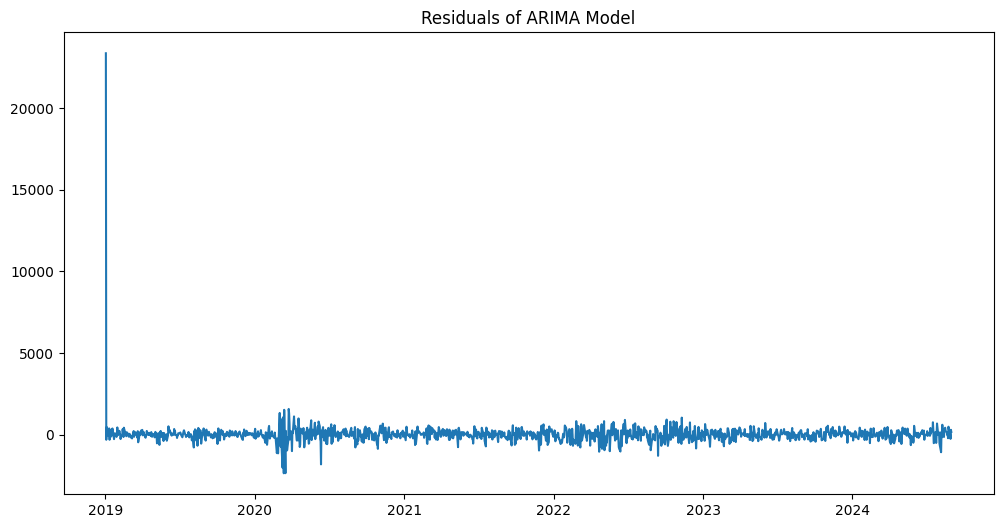

Fitting ARIMA model to Russell 2000:
Best ARIMA order: (2, 1, 2) with AIC: 13547.882056227234
                               SARIMAX Results                                
Dep. Variable:                   ^RUT   No. Observations:                 1426
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6768.941
Date:                Mon, 18 Nov 2024   AIC                          13547.882
Time:                        05:54:19   BIC                          13574.192
Sample:                             0   HQIC                         13557.709
                               - 1426                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7250      0.053    -32.266      0.000      -1.830      -1.620
ar.L2         -0.8564      0.052    -

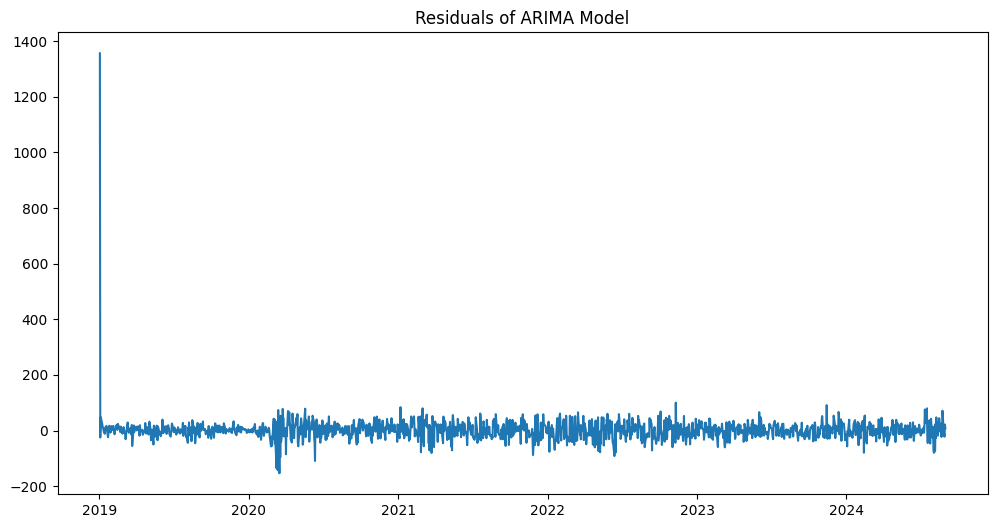

Fitting ARIMA model to NYSE Composite:
Best ARIMA order: (2, 1, 2) with AIC: 18495.02936114044
                               SARIMAX Results                                
Dep. Variable:                   ^NYA   No. Observations:                 1426
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9242.515
Date:                Mon, 18 Nov 2024   AIC                          18495.029
Time:                        05:54:41   BIC                          18521.339
Sample:                             0   HQIC                         18504.856
                               - 1426                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7383      0.029    -60.541      0.000      -1.795      -1.682
ar.L2         -0.8693      0.026    

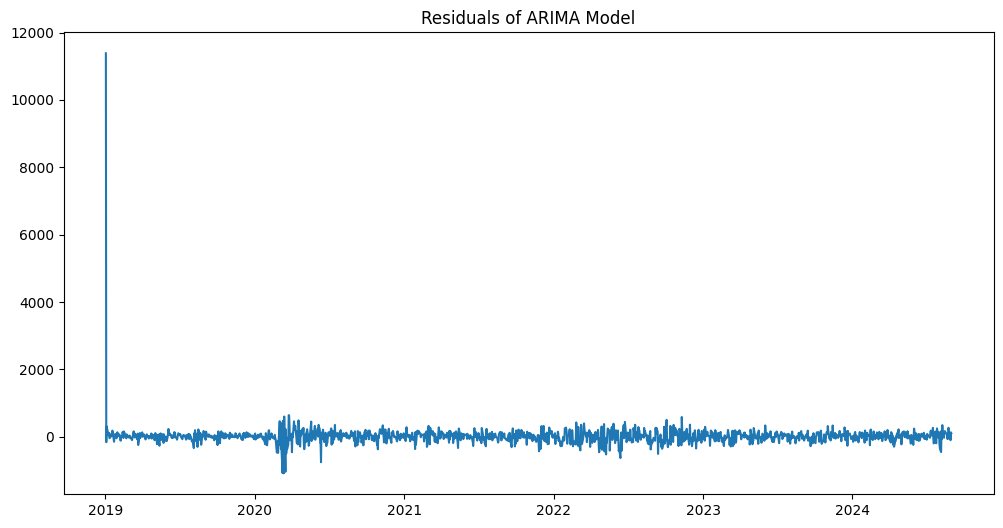

Fitting ARIMA Models to Asian Markets:
Fitting ARIMA model to Nikkei 225:
Best ARIMA order: (2, 1, 2) with AIC: 20198.387499388016
                               SARIMAX Results                                
Dep. Variable:                  ^N225   No. Observations:                 1381
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10094.194
Date:                Mon, 18 Nov 2024   AIC                          20198.387
Time:                        05:55:02   BIC                          20224.537
Sample:                             0   HQIC                         20208.170
                               - 1381                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5664      0.016    -97.293      0.000      -1.598      -1.535


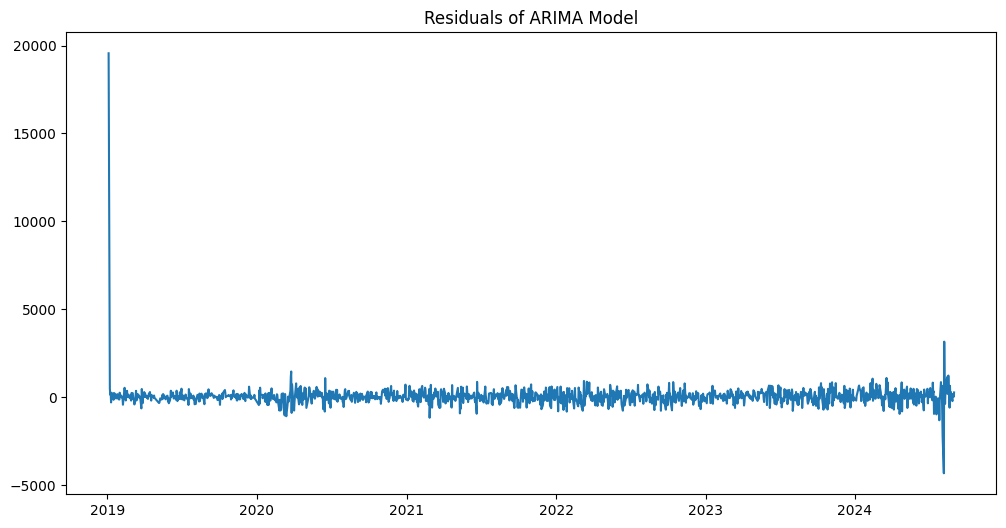

Fitting ARIMA model to Shanghai Composite:
Best ARIMA order: (2, 1, 2) with AIC: 13462.871019748294
                               SARIMAX Results                                
Dep. Variable:              000001.SS   No. Observations:                 1374
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6726.436
Date:                Mon, 18 Nov 2024   AIC                          13462.871
Time:                        05:55:19   BIC                          13488.995
Sample:                             0   HQIC                         13472.646
                               - 1374                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6157      0.011    148.311      0.000       1.594       1.637
ar.L2         -0.9903      0.01

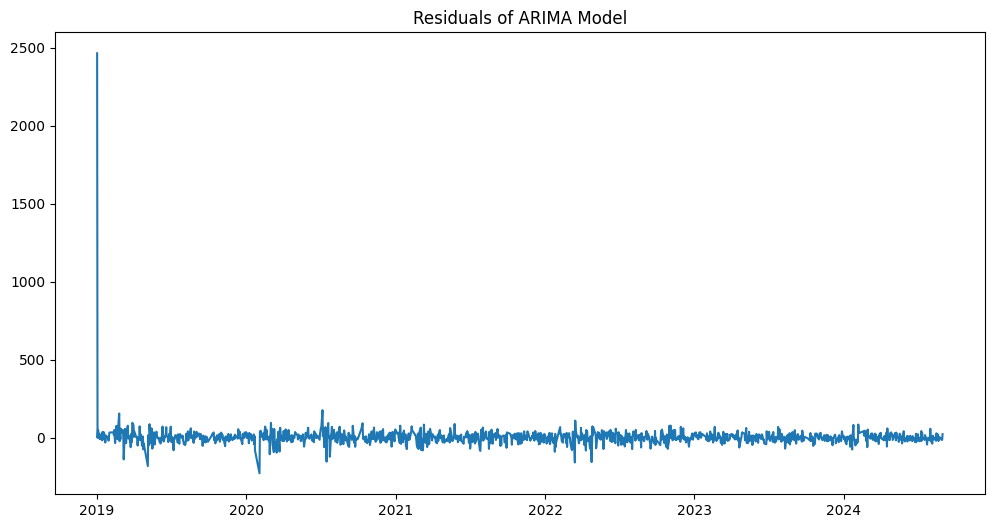

Fitting ARIMA model to Hang Seng:
Best ARIMA order: (2, 1, 2) with AIC: 20054.840214514148
                               SARIMAX Results                                
Dep. Variable:                   ^HSI   No. Observations:                 1395
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10022.420
Date:                Mon, 18 Nov 2024   AIC                          20054.840
Time:                        05:55:44   BIC                          20081.040
Sample:                             0   HQIC                         20064.636
                               - 1395                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9939      0.008   -130.791      0.000      -1.009      -0.979
ar.L2         -0.9751      0.008   -125.

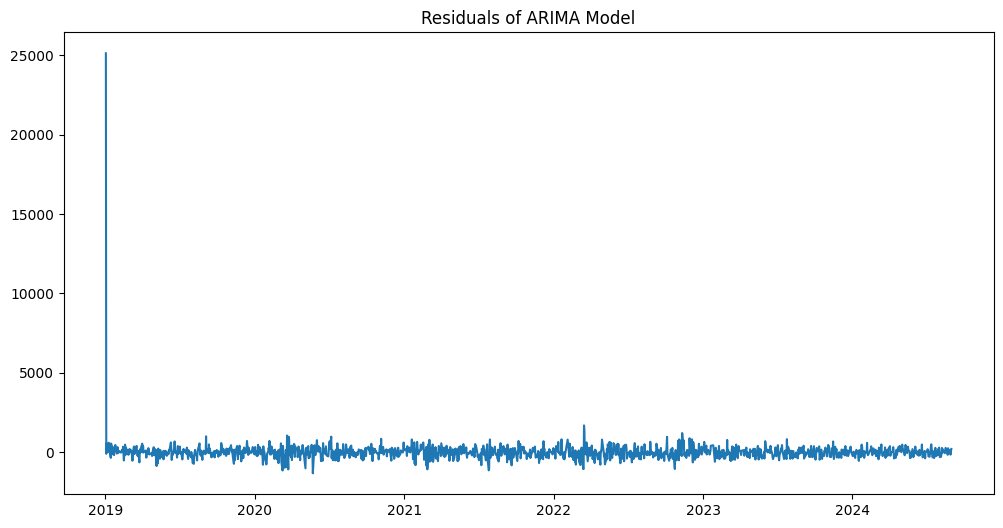

Fitting ARIMA model to KOSPI:
Best ARIMA order: (0, 1, 0) with AIC: 13323.19715738088
                               SARIMAX Results                                
Dep. Variable:                  ^KS11   No. Observations:                 1396
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -6660.599
Date:                Mon, 18 Nov 2024   AIC                          13323.197
Time:                        05:56:02   BIC                          13328.438
Sample:                             0   HQIC                         13325.157
                               - 1396                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       821.6953     17.023     48.271      0.000     788.331     855.059
Ljung-Box (L1) (Q):                   0.17   

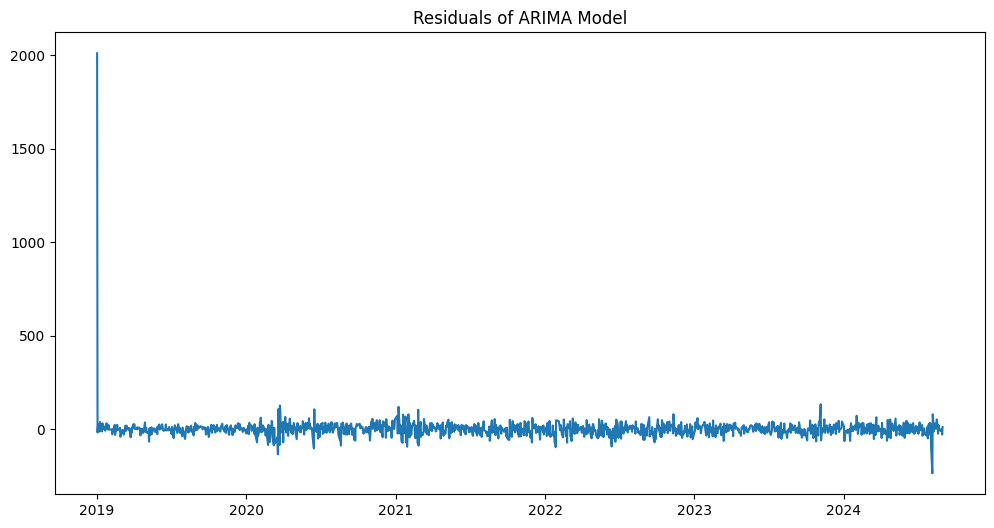

Fitting ARIMA model to Nifty 50:
Best ARIMA order: (1, 2, 1) with AIC: 18129.964314554938
                               SARIMAX Results                                
Dep. Variable:                  ^NSEI   No. Observations:                 1395
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -9061.982
Date:                Mon, 18 Nov 2024   AIC                          18129.964
Time:                        05:56:24   BIC                          18145.682
Sample:                             0   HQIC                         18135.841
                               - 1395                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0397      0.016     -2.456      0.014      -0.071      -0.008
ma.L1         -0.9992      0.007   -153.3

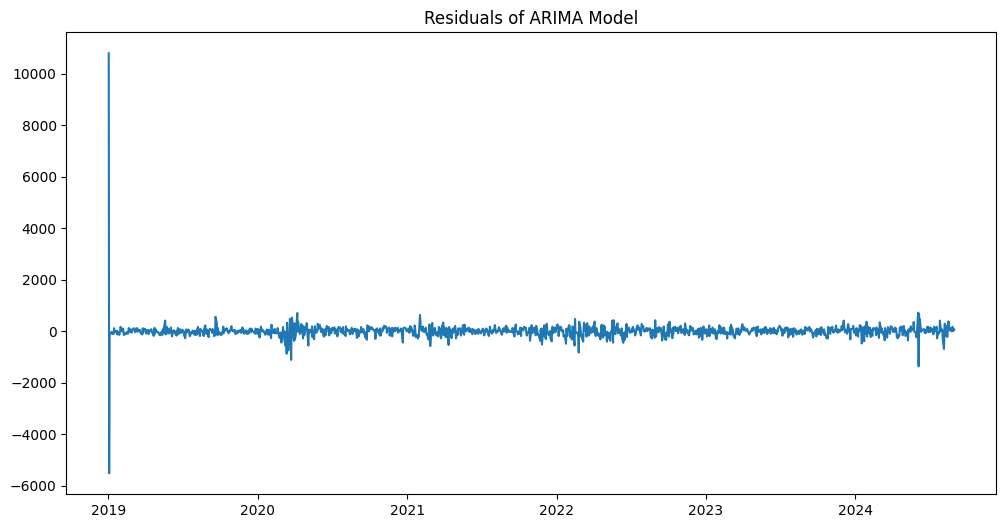

Comparing Volatility Between US and Asian Markets:
US Market Volatilities: {'S&P 500': Ticker
^GSPC    0.012905
dtype: float64, 'NASDAQ': Ticker
^IXIC    0.01539
dtype: float64, 'Dow Jones': Ticker
^DJI    0.01259
dtype: float64, 'Russell 2000': Ticker
^RUT    0.016792
dtype: float64, 'NYSE Composite': Ticker
^NYA    0.012293
dtype: float64}
Asian Market Volatilities: {'Nikkei 225': Ticker
^N225    0.01298
dtype: float64, 'Shanghai Composite': Ticker
000001.SS    0.010403
dtype: float64, 'Hang Seng': Ticker
^HSI    0.014666
dtype: float64, 'KOSPI': Ticker
^KS11    0.012065
dtype: float64, 'Nifty 50': Ticker
^NSEI    0.011745
dtype: float64}


In [ ]:
# 1.1 Define US and Asian Indexes Separately
us_indexes = {
    'S&P 500': '^GSPC',
    'NASDAQ': '^IXIC',
    'Dow Jones': '^DJI',
    'Russell 2000': '^RUT',
    'NYSE Composite': '^NYA'
}

asian_indexes = {
    'Nikkei 225': '^N225',
    'Shanghai Composite': '000001.SS',
    'Hang Seng': '^HSI',
    'KOSPI': '^KS11',
    'Nifty 50': '^NSEI'
}

# 1.2 Fetching Data Separately
def fetch_all_market_data(index_dict, start_date, end_date):
    """
    Fetches historical data for all the indexes in the dictionary.
    """
    market_data = {}
    for name, ticker in index_dict.items():
        data = fetch_market_data(start_date, end_date, ticker)
        cleaned_data = data
        market_data[name] = cleaned_data
    return market_data


# 2.1 Analysis - US and Asian Data can be processed separately

# Apply exploratory data analysis for US Markets
def analyze_us_markets(us_market_data):
    """
    Analyzes US market data including time series plots and statistical tests.
    """
    for name, df in us_market_data.items():
        print(f"Analyzing {name}:")
        plot_time_series(df, title=f'{name} Time Series')
        descriptive_stats = calculate_descriptive_stats(df)
        print(f'{name} Descriptive Stats:\n', descriptive_stats)
        adf_p_value = test_stationarity(df)
        print(f'{name} Stationarity Test p-value:', adf_p_value)

# Apply exploratory data analysis for Asian Markets
def analyze_asian_markets(asian_market_data):
    """
    Analyzes Asian market data including time series plots and statistical tests.
    """
    for name, df in asian_market_data.items():
        print(f"Analyzing {name}:")
        plot_time_series(df, title=f'{name} Time Series')
        descriptive_stats = calculate_descriptive_stats(df)
        print(f'{name} Descriptive Stats:\n', descriptive_stats)
        adf_p_value = test_stationarity(df)
        print(f'{name} Stationarity Test p-value:', adf_p_value)


# 3.1 ARIMA Modeling
def fit_arima_to_us_markets(us_market_data):
    """
    Fits ARIMA models to US markets.
    """
    for name, df in us_market_data.items():
        print(f"Fitting ARIMA model to {name}:")
        best_order = optimize_arima_params(df)
        fitted_model = fit_arima_model(df, order=best_order)
        analyze_residuals(fitted_model)

def fit_arima_to_asian_markets(asian_market_data):
    """
    Fits ARIMA models to Asian markets.
    """
    for name, df in asian_market_data.items():
        print(f"Fitting ARIMA model to {name}:")
        best_order = optimize_arima_params(df)
        fitted_model = fit_arima_model(df, order=best_order)
        analyze_residuals(fitted_model)


# 4.1 Comparative Volatility Analysis
def compare_volatility_between_us_and_asian(us_market_data, asian_market_data):
    """
    Compares the volatility between US and Asian markets.
    """
    us_volatility = {name: df['Close'].pct_change().std() for name, df in us_market_data.items()}
    asian_volatility = {name: df['Close'].pct_change().std() for name, df in asian_market_data.items()}

    print("US Market Volatilities:", us_volatility)
    print("Asian Market Volatilities:", asian_volatility)

    return us_volatility, asian_volatility


# 5.1 Execute Analysis
if __name__ == "__main__":
    # Perform US market analysis
    print("US Markets Analysis:")
    analyze_us_markets(us_market_data)

    # Perform Asian market analysis
    print("Asian Markets Analysis:")
    analyze_asian_markets(asian_market_data)

    # Fit ARIMA models to US and Asian markets
    print("Fitting ARIMA Models to US Markets:")
    fit_arima_to_us_markets(us_market_data)

    print("Fitting ARIMA Models to Asian Markets:")
    fit_arima_to_asian_markets(asian_market_data)

    # Compare volatility between US and Asian markets
    print("Comparing Volatility Between US and Asian Markets:")
    us_vol, asian_vol = compare_volatility_between_us_and_asian(us_market_data, asian_market_data)


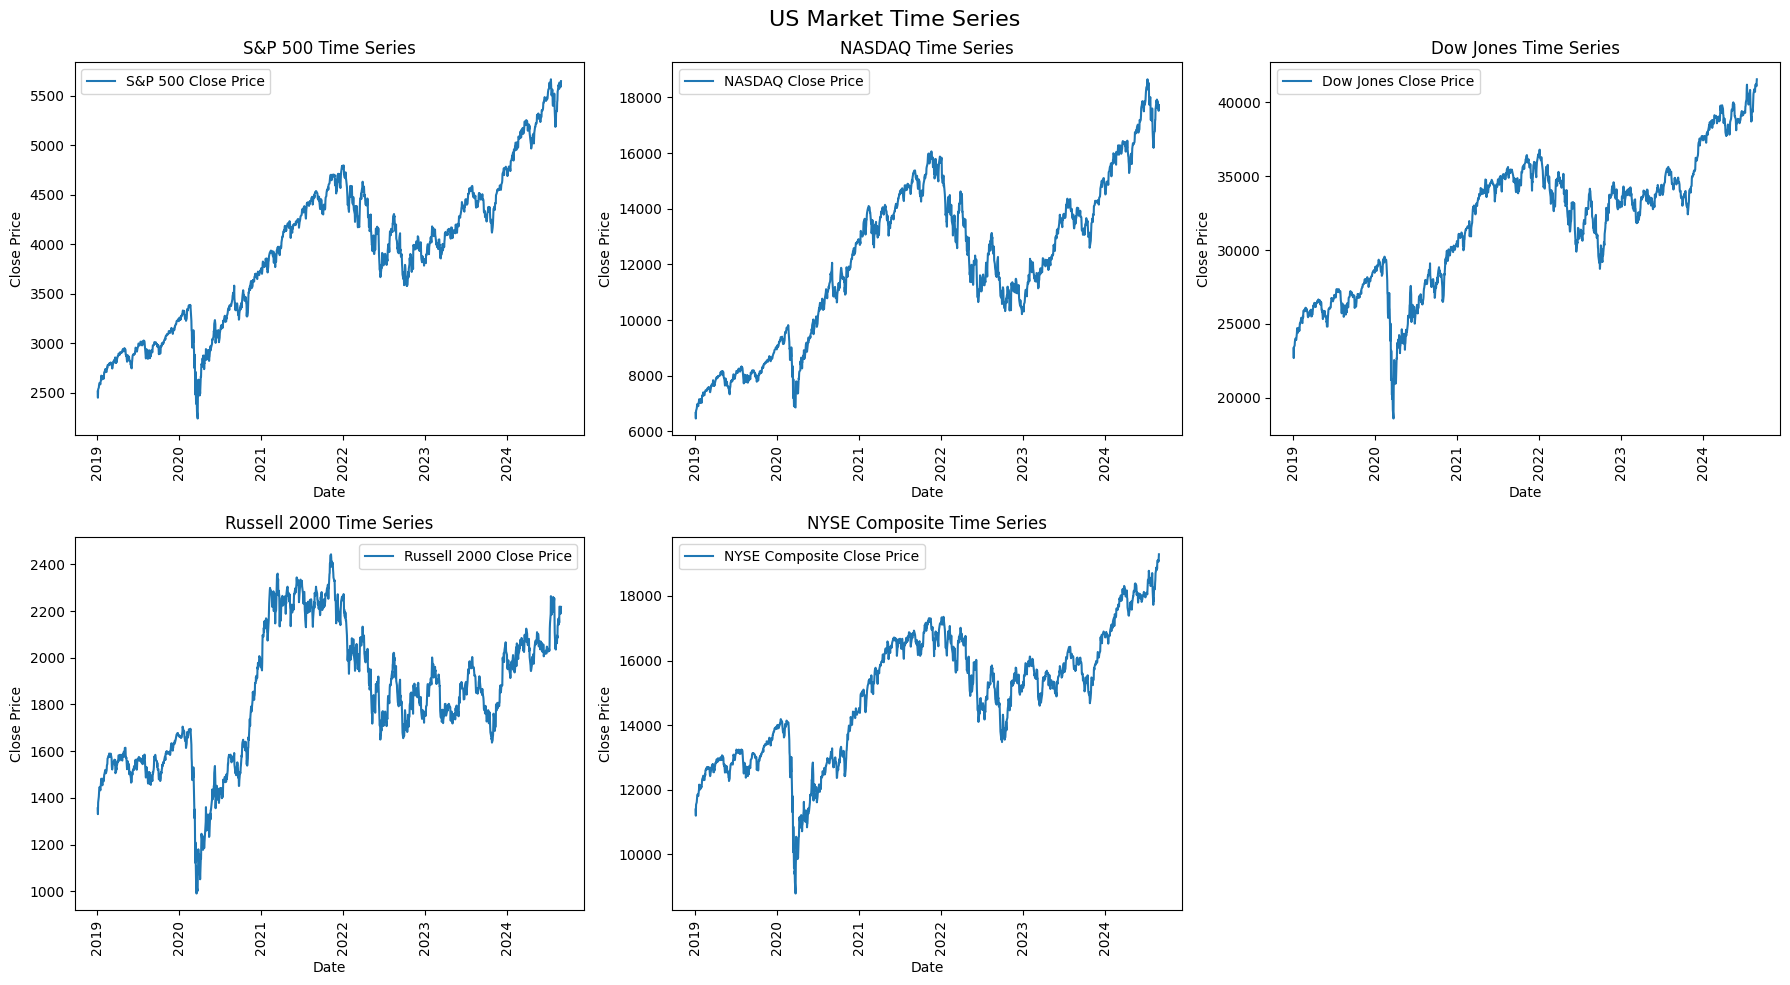

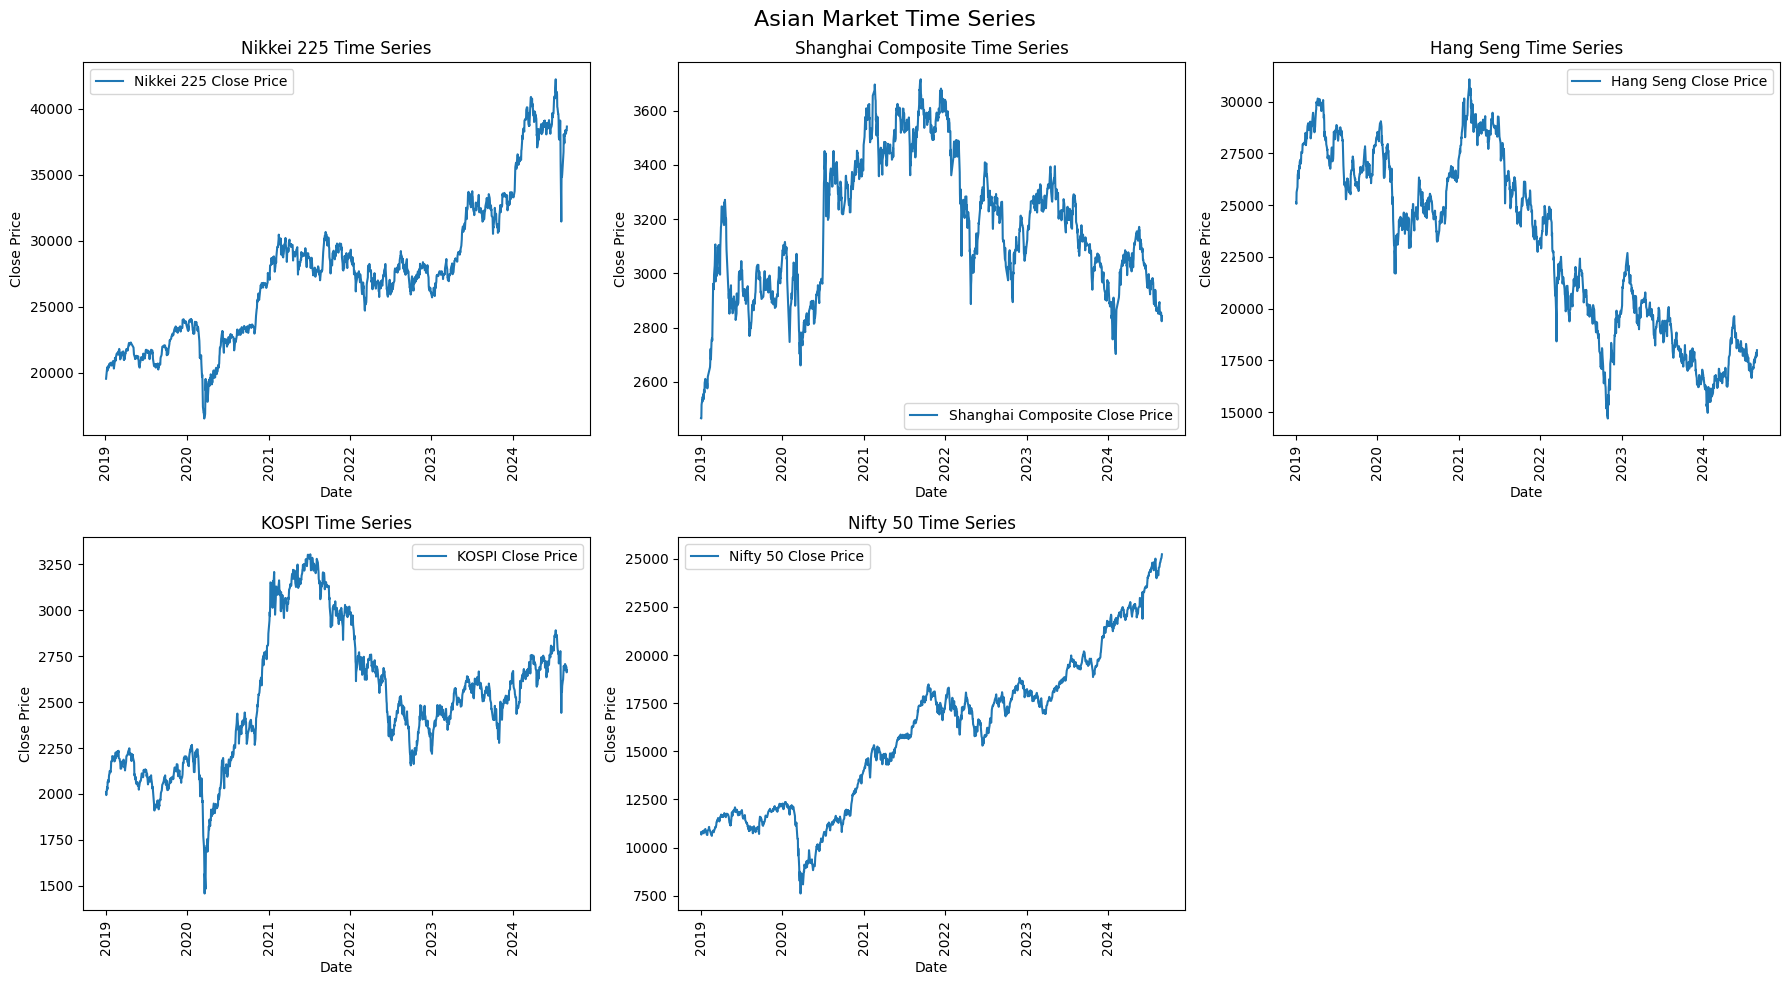

In [ ]:
# Modified function to create subplots with rotated x-axis labels
def plot_time_series_subplot_grid(market_data, market_type):
    """
    Plots time series data for each index in a grid layout with 2 rows and 3 columns.
    """
    num_plots = len(market_data)
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
    fig.suptitle(f'{market_type} Market Time Series', fontsize=16)

    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Iterate through each index and plot
    for idx, (name, df) in enumerate(market_data.items()):
        ax = axes[idx]
        ax.plot(df.index, df['Close'], label=f'{name} Close Price')
        ax.set_title(f'{name} Time Series')
        ax.set_xlabel('Date')
        ax.set_ylabel('Close Price')
        ax.legend()
        # Rotate x-axis labels by 90 degrees
        for label in ax.get_xticklabels():
            label.set_rotation(90)

    # Hide any extra axes if less than 6 plots
    for i in range(len(market_data), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# call for US market data
plot_time_series_subplot_grid(us_market_data, "US")

# call for Asian market data
plot_time_series_subplot_grid(asian_market_data, "Asian")


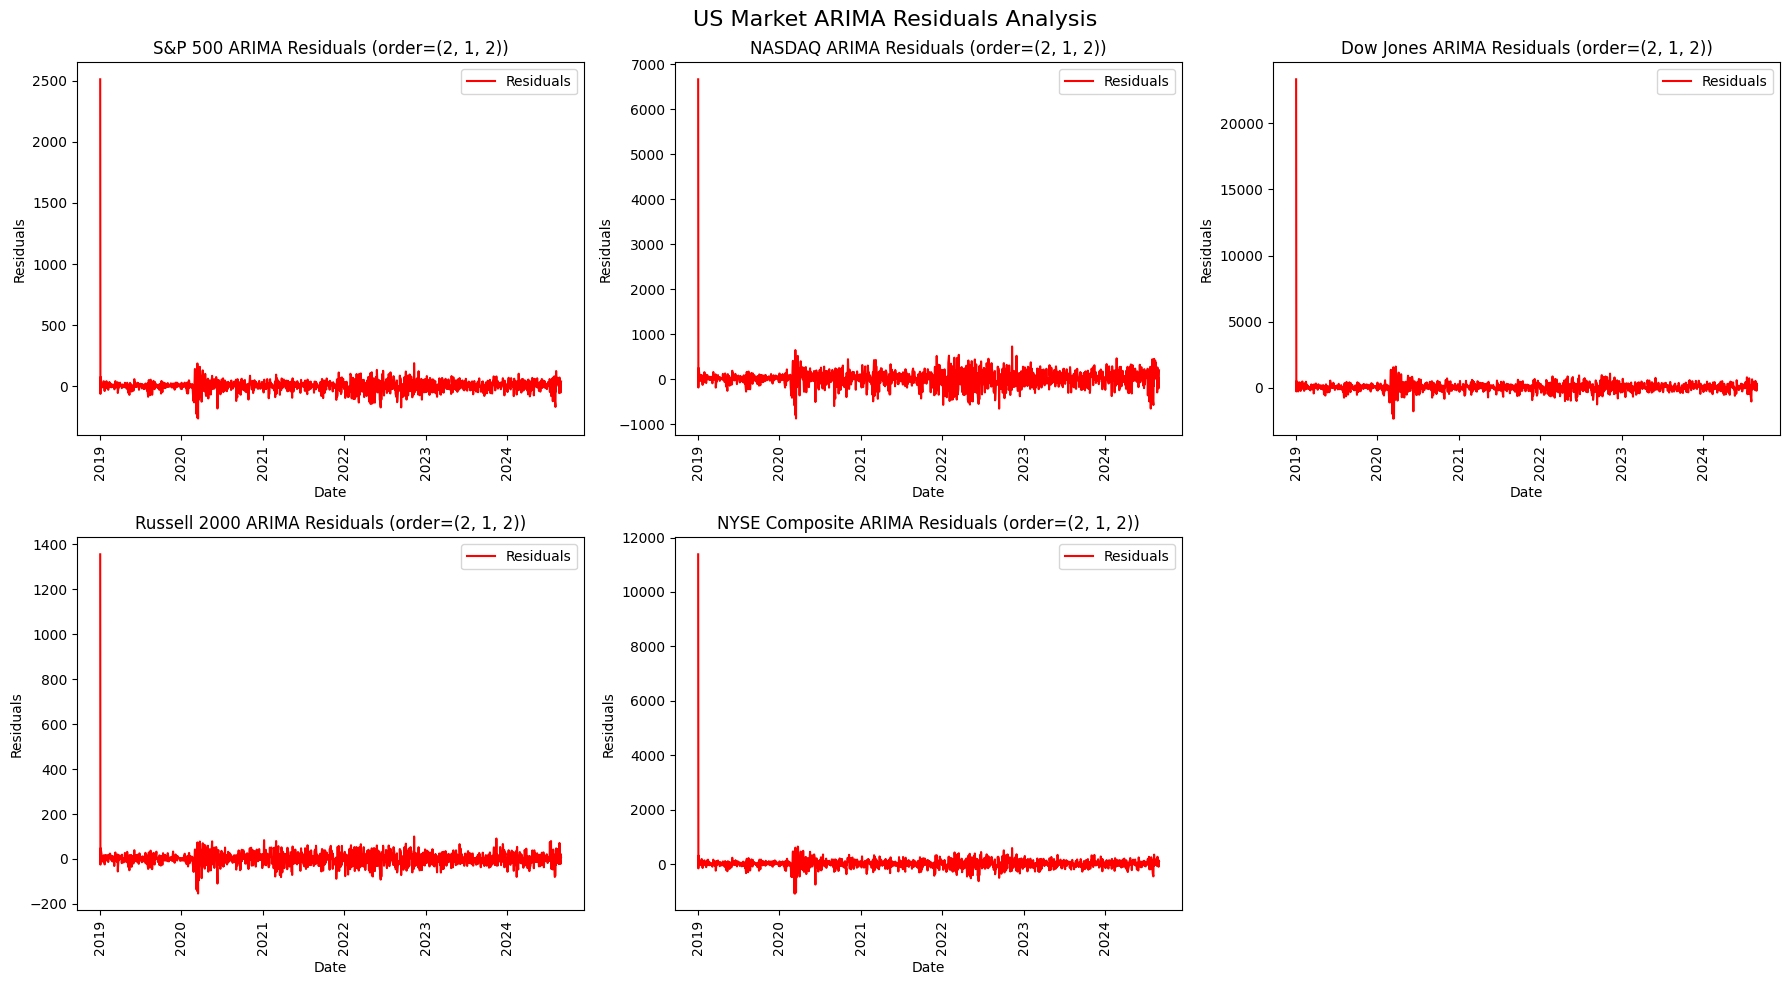

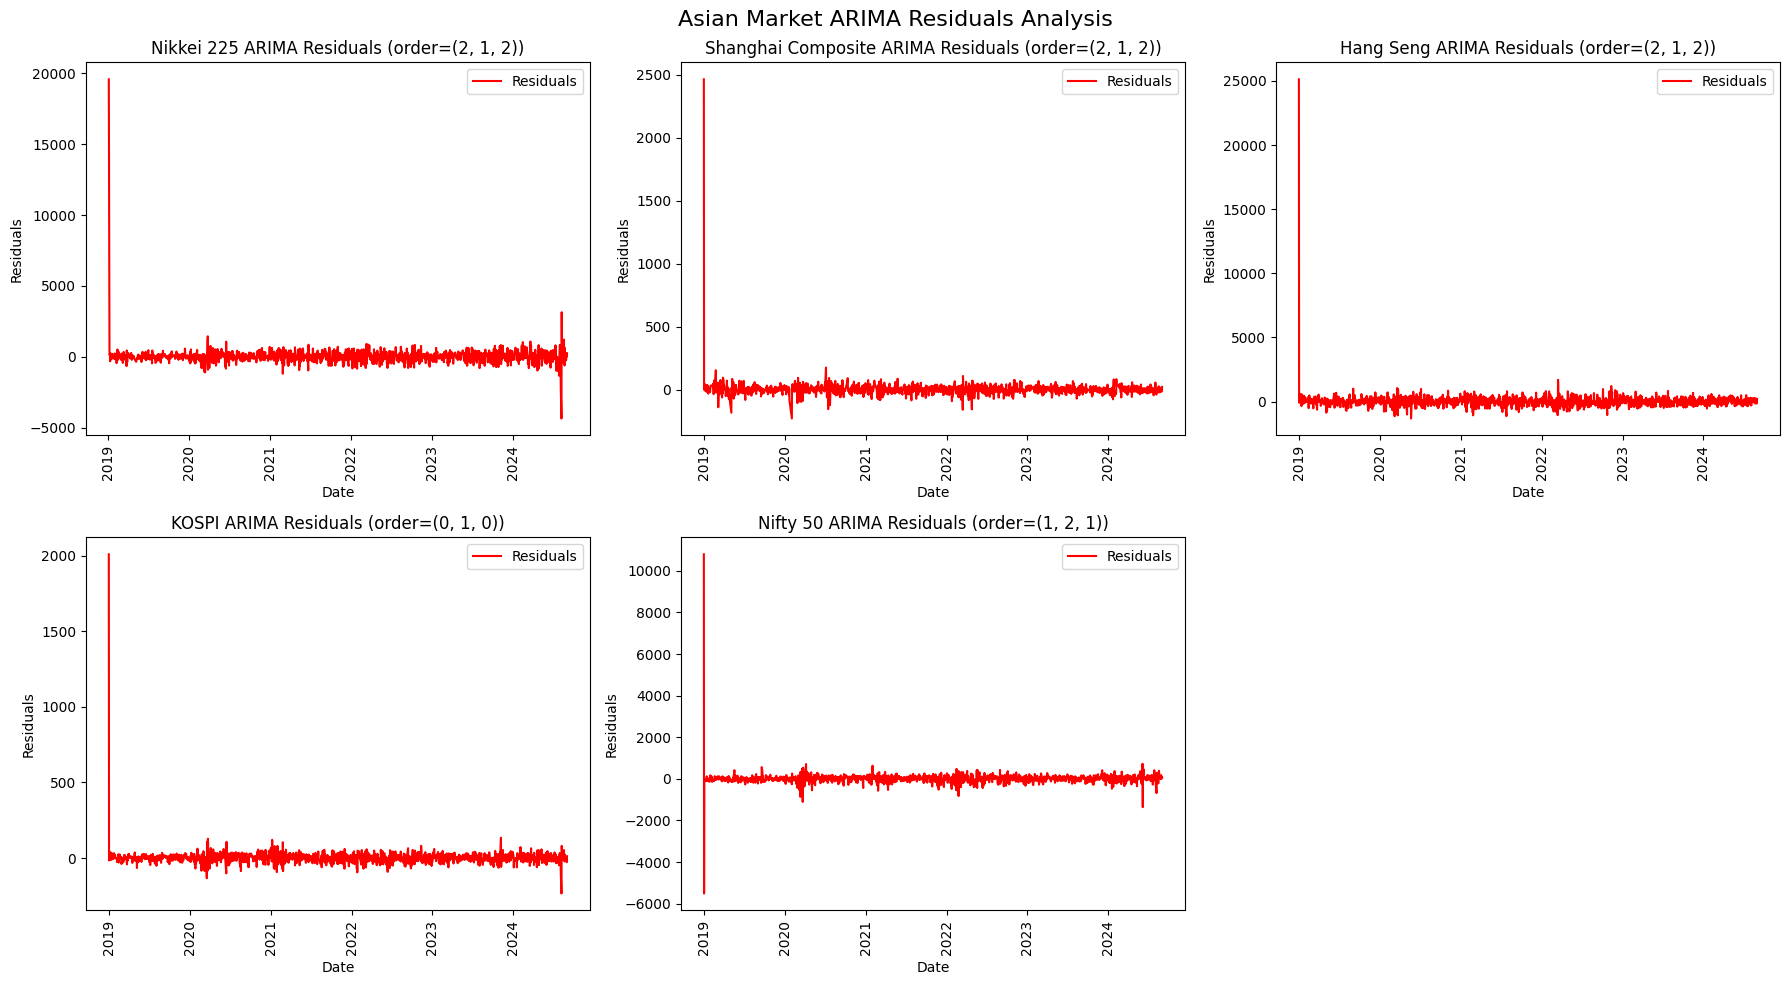

In [ ]:
#  ARIMA orders
arima_orders = {
    'S&P 500': (2, 1, 2),
    'NASDAQ': (2, 1, 2),
    'Dow Jones': (2, 1, 2),
    'Russell 2000': (2, 1, 2),
    'NYSE Composite': (2, 1, 2),
    'Nikkei 225': (2, 1, 2),
    'Shanghai Composite': (2, 1, 2),
    'Hang Seng': (2, 1, 2),
    'KOSPI': (0, 1, 0),
    'Nifty 50':(1, 2, 1)
}


# Modified function to create 2x3 subplots for residual analysis for US and Asian markets
def analyze_residuals_subplot_grid(market_data, market_type, arima_orders):
    """
    Plots ARIMA model residuals for each index in a grid layout with 2 rows and 3 columns.
    """
    num_plots = len(market_data)
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
    fig.suptitle(f'{market_type} Market ARIMA Residuals Analysis', fontsize=16)

    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Iterate through each index and plot ARIMA residuals
    for idx, (name, df) in enumerate(market_data.items()):
        ax = axes[idx]
        order = arima_orders.get(name, (1, 1, 1))  # Default to (1, 1, 1) if not provided
        model = ARIMA(df['Close'], order=order)
        fitted_model = model.fit()

        # Plot residuals
        residuals = fitted_model.resid
        ax.plot(df.index, residuals, label='Residuals', color='red')
        ax.set_title(f'{name} ARIMA Residuals (order={order})')
        ax.set_xlabel('Date')
        ax.set_ylabel('Residuals')
        ax.legend()

        # Rotate x-axis labels by 90 degrees
        for label in ax.get_xticklabels():
            label.set_rotation(90)

    # Hide any extra axes if less than 6 plots
    for i in range(len(market_data), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

#  call for US market data residual analysis (assuming you have `us_market_data` and `arima_orders`)
analyze_residuals_subplot_grid(us_market_data, "US", arima_orders)

#  call for Asian market data residual analysis
analyze_residuals_subplot_grid(asian_market_data, "Asian", arima_orders)




# #  ARIMA orders
# arima_orders = {
#     'S&P 500': (2, 1, 2),
#     'NASDAQ': (2, 1, 2),
#     'Dow Jones': (2, 1, 2),
#     'Russell 2000': (2, 1, 2),
#     'NYSE Composite': (2, 1, 2),
#     'Nikkei 225': (2, 1, 2),
#     'Shanghai Composite': (2, 1, 2),
#     'Hang Seng': (2, 1, 2),
#     'KOSPI': (0, 1, 0),
#     'Nifty 50':(1, 2, 1)
# }




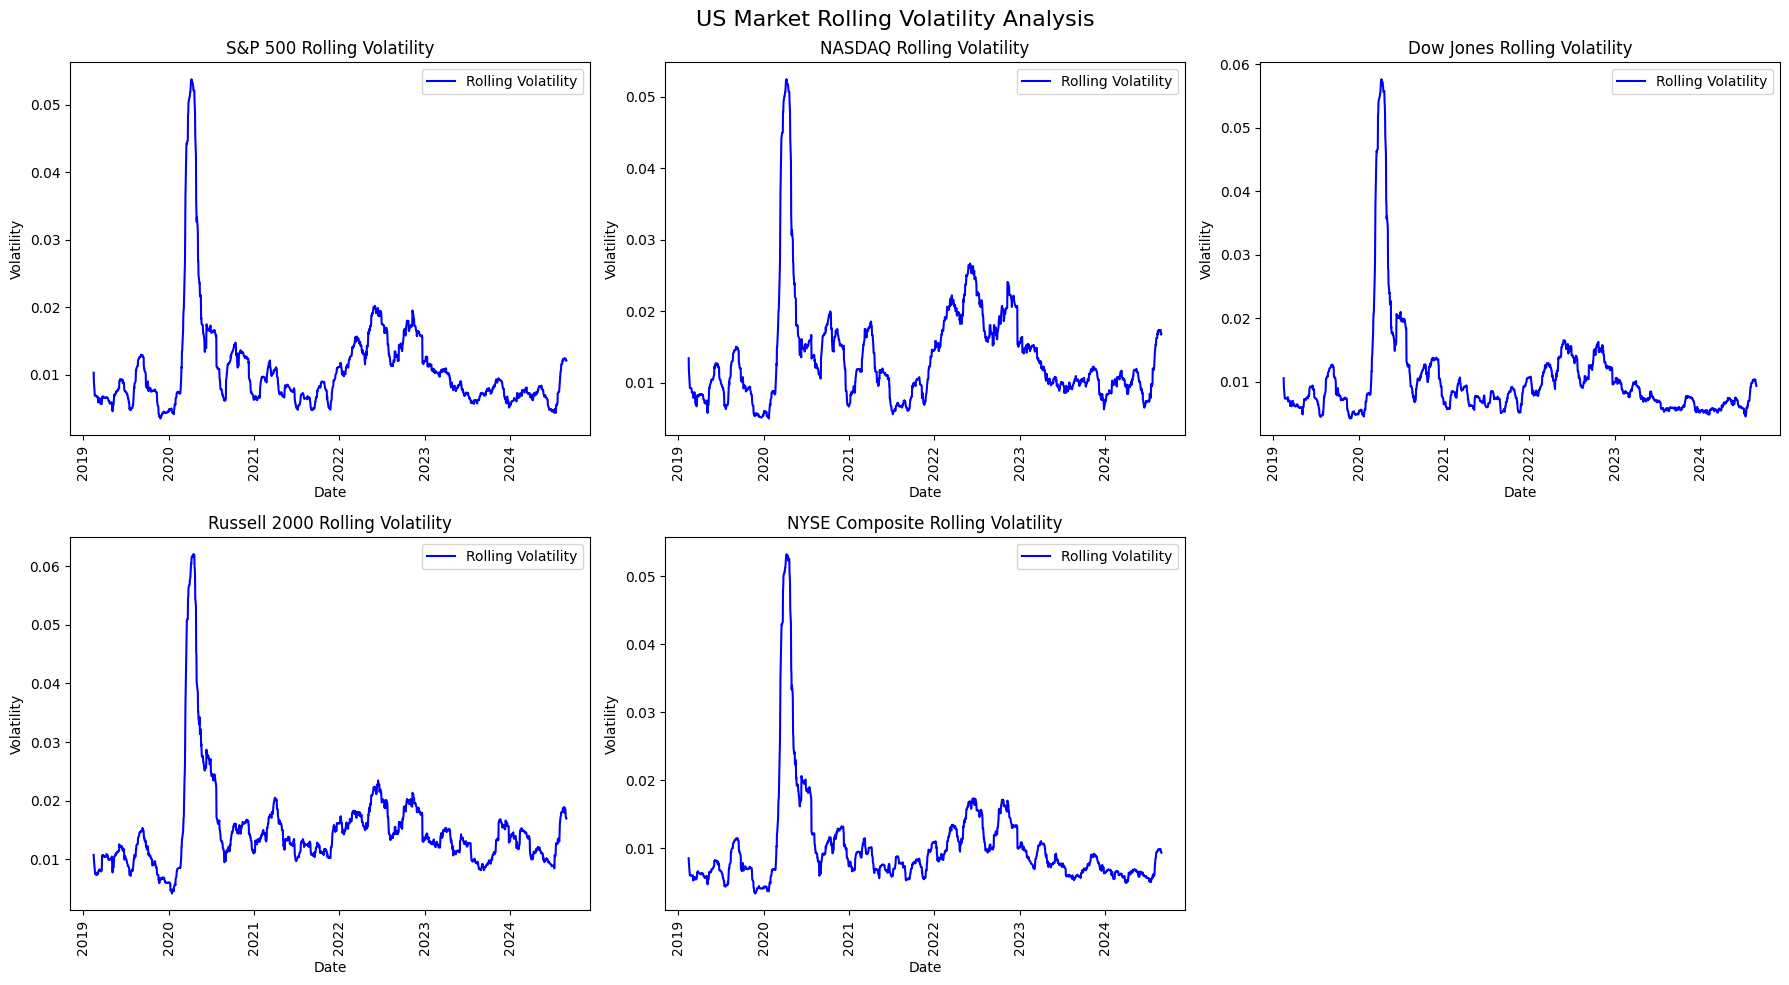

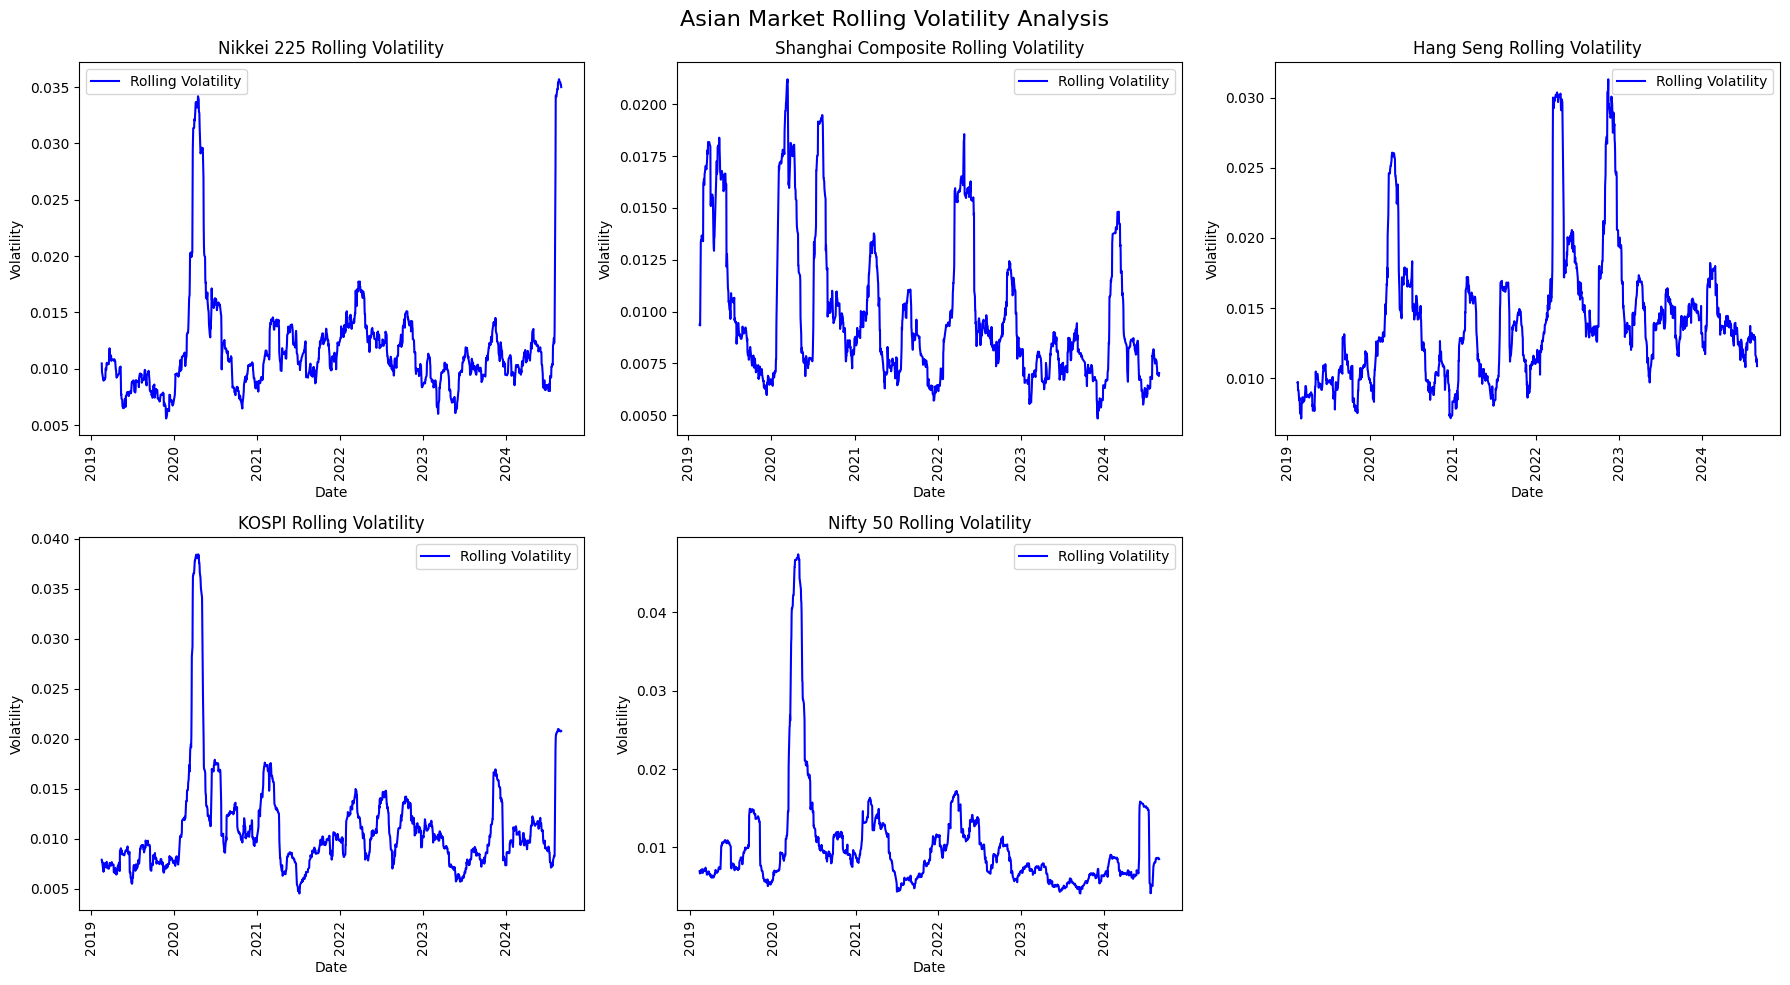

In [ ]:
# Modified function to create 2x3 subplots for rolling volatility analysis for US and Asian markets
def rolling_volatility_subplot_grid(market_data, market_type, window_size=30):
    """
    Plots rolling volatility for each index in a grid layout with 2 rows and 3 columns.
    """
    num_plots = len(market_data)
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
    fig.suptitle(f'{market_type} Market Rolling Volatility Analysis', fontsize=16)

    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Iterate through each index and plot rolling volatility
    for idx, (name, df) in enumerate(market_data.items()):
        ax = axes[idx]
        rolling_volatility = df['Close'].pct_change().rolling(window=window_size).std()
        ax.plot(df.index, rolling_volatility, label='Rolling Volatility', color='blue')
        ax.set_title(f'{name} Rolling Volatility')
        ax.set_xlabel('Date')
        ax.set_ylabel('Volatility')
        ax.legend()

        # Rotate x-axis labels by 90 degrees
        for label in ax.get_xticklabels():
            label.set_rotation(90)

    # Hide any extra axes if less than 6 plots
    for i in range(len(market_data), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# call for US market data rolling volatility analysis (assuming you have `us_market_data`)
rolling_volatility_subplot_grid(us_market_data, "US")

# call for Asian market data rolling volatility analysis
rolling_volatility_subplot_grid(asian_market_data, "Asian")


# **Individual Analysis of the indexes**

# **S&P 500**

## Step 1: Fetch and clean data
## 1. Data Collection and Preparation

In [ ]:
# Fetch market data for S&P 500
def fetch_stock_data(start_date, end_date):
    """
    Fetches historical stock data from Yahoo Finance.
    """
    stock_data = yf.download('^GSPC', start=start_date, end=end_date)
    stock_data.reset_index(inplace=True)
    return stock_data



## Data cleaning

In [ ]:
def clean_data(df):
    """
    Cleans the data by handling missing values and standardizing formats.
    """
    df.dropna(inplace=True)  # Remove missing values
    df['Date'] = pd.to_datetime(df['Date'])  # Ensure the date column is in datetime format
    df.set_index('Date', inplace=True)  # Set the date column as index
    return df
# Fetch and clean data
start_date = '2017-01-01'
end_date = '2024-09-01'
stock_data = fetch_stock_data(start_date, end_date)
stock_data_cleaned = clean_data(stock_data)

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data

Price                        Adj Close        Close         High          Low  \
Ticker                           ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                            
2017-01-03 00:00:00+00:00  2257.830078  2257.830078  2263.879883  2245.129883   
2017-01-04 00:00:00+00:00  2270.750000  2270.750000  2272.820068  2261.600098   
2017-01-05 00:00:00+00:00  2269.000000  2269.000000  2271.500000  2260.449951   
2017-01-06 00:00:00+00:00  2276.979980  2276.979980  2282.100098  2264.060059   
2017-01-09 00:00:00+00:00  2268.899902  2268.899902  2275.489990  2268.899902   
...                                ...          ...          ...          ...   
2024-08-26 00:00:00+00:00  5616.839844  5616.839844  5651.620117  5602.339844   
2024-08-27 00:00:00+00:00  5625.799805  5625.799805  5631.180176  5593.479980   
2024-08-28 00:00:00+00:00  5592.180176  5592.180176  5627.029785  5560.950195   
2024-08-29 00:00:00+00:00  5591.959961  5591.959961  5646.950195  5583.709961   
2024-08-30 00:00:00+00:00  5648.399902  5648.399902  5651.370117  5581.790039   

Price                             Open      Volume  
Ticker                           ^GSPC       ^GSPC  
Date                                                
2017-01-03 00:00:00+00:00  2251.570068  3773010000  
2017-01-04 00:00:00+00:00  2261.600098  3768890000  
2017-01-05 00:00:00+00:00  2268.179932  3785080000  
2017-01-06 00:00:00+00:00  2271.139893  3342080000  
2017-01-09 00:00:00+00:00  2273.590088  3219730000  
...                                ...         ...  
2024-08-26 00:00:00+00:00  5639.660156  2938570000  
2024-08-27 00:00:00+00:00  5602.890137  2798990000  
2024-08-28 00:00:00+00:00  5624.509766  3053450000  
2024-08-29 00:00:00+00:00  5607.299805  3065640000  
2024-08-30 00:00:00+00:00  5612.740234  4185850000  

[1928 rows x 6 columns]

In [ ]:
stock_data_cleaned

Price                        Adj Close        Close         High          Low  \
Ticker                           ^GSPC        ^GSPC        ^GSPC        ^GSPC   
Date                                                                            
2017-01-03 00:00:00+00:00  2257.830078  2257.830078  2263.879883  2245.129883   
2017-01-04 00:00:00+00:00  2270.750000  2270.750000  2272.820068  2261.600098   
2017-01-05 00:00:00+00:00  2269.000000  2269.000000  2271.500000  2260.449951   
2017-01-06 00:00:00+00:00  2276.979980  2276.979980  2282.100098  2264.060059   
2017-01-09 00:00:00+00:00  2268.899902  2268.899902  2275.489990  2268.899902   
...                                ...          ...          ...          ...   
2024-08-26 00:00:00+00:00  5616.839844  5616.839844  5651.620117  5602.339844   
2024-08-27 00:00:00+00:00  5625.799805  5625.799805  5631.180176  5593.479980   
2024-08-28 00:00:00+00:00  5592.180176  5592.180176  5627.029785  5560.950195   
2024-08-29 00:00:00+00:00  5591.959961  5591.959961  5646.950195  5583.709961   
2024-08-30 00:00:00+00:00  5648.399902  5648.399902  5651.370117  5581.790039   

Price                             Open      Volume  
Ticker                           ^GSPC       ^GSPC  
Date                                                
2017-01-03 00:00:00+00:00  2251.570068  3773010000  
2017-01-04 00:00:00+00:00  2261.600098  3768890000  
2017-01-05 00:00:00+00:00  2268.179932  3785080000  
2017-01-06 00:00:00+00:00  2271.139893  3342080000  
2017-01-09 00:00:00+00:00  2273.590088  3219730000  
...                                ...         ...  
2024-08-26 00:00:00+00:00  5639.660156  2938570000  
2024-08-27 00:00:00+00:00  5602.890137  2798990000  
2024-08-28 00:00:00+00:00  5624.509766  3053450000  
2024-08-29 00:00:00+00:00  5607.299805  3065640000  
2024-08-30 00:00:00+00:00  5612.740234  4185850000  

[1928 rows x 6 columns]

## Step 2: Perform Exploratory Data Analysis (EDA)

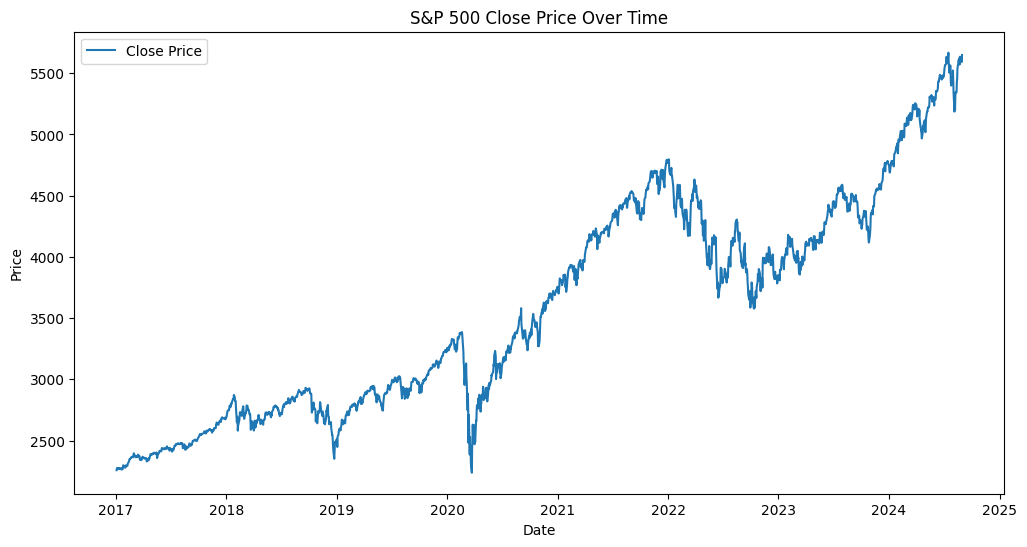

ADF Statistic: -0.11174850526483021
p-value: 0.9482556909017372
Critical Values: 1%, -3.4337657944732745
Critical Values: 5%, -2.863048878223751
Critical Values: 10%, -2.567573268289192


In [ ]:
plot_time_series(stock_data_cleaned, 'S&P 500 Close Price Over Time')
calculate_descriptive_stats(stock_data_cleaned)
stationarity_p_value = test_stationarity(stock_data_cleaned)


## Step 3: Fit ARIMA and GARCH Models

In [ ]:
arima_order = optimize_arima_params(stock_data_cleaned)
arima_model = fit_arima_model(stock_data_cleaned, arima_order)
garch_model = fit_garch_model(stock_data_cleaned)


Best ARIMA order: (2, 1, 2) with AIC: 19665.50213460611
                               SARIMAX Results                                
Dep. Variable:                  ^GSPC   No. Observations:                 1928
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9827.751
Date:                Mon, 18 Nov 2024   AIC                          19665.502
Time:                        05:57:13   BIC                          19693.321
Sample:                             0   HQIC                         19675.736
                               - 1928                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7586      0.025    -71.522      0.000      -1.807      -1.710
ar.L2         -0.8777      0.023    -37.784      0.000      -0.923      -0.

## Step 4: Perform Cross-Validation on ARIMA model

In [ ]:
arima_order = (2, 1, 2)
cross_validate_arima_model(stock_data_cleaned, arima_order)

Cross-validation Mean Squared Error (MSE): nan


nan

## Step 5: Conduct Sensitivity Analysis

In [ ]:
sensitivity_results = sensitivity_analysis_arima(stock_data_cleaned, base_order=arima_order)


Order (1, 1, 2) - AIC: 19724.067683808906, BIC: 19746.322562482565
Order (2, 0, 2) - AIC: 19745.872664788, BIC: 19779.258095639023
Order (2, 1, 1) - AIC: 19724.207951097098, BIC: 19746.462829770757


## Step 6: Compare Model Performance

In [ ]:
arima_model = fit_arima_model(stock_data_cleaned, arima_order)
garch_model = fit_garch_model(stock_data_cleaned)

                               SARIMAX Results                                
Dep. Variable:                  ^GSPC   No. Observations:                 1928
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9827.751
Date:                Mon, 18 Nov 2024   AIC                          19665.502
Time:                        05:57:21   BIC                          19693.321
Sample:                             0   HQIC                         19675.736
                               - 1928                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7586      0.025    -71.522      0.000      -1.807      -1.710
ar.L2         -0.8777      0.023    -37.784      0.000      -0.923      -0.832
ma.L1          1.6866      0.031     55.127      0.0

## Step 7: Segment data for comparative analysis
We will segment the data into pre-pandemic, pandemic, and post-pandemic periods and compare volatility

In [ ]:

pre_pandemic_data = segment_data_by_period(stock_data_cleaned, '2017-01-01', '2020-03-01')
pandemic_data = segment_data_by_period(stock_data_cleaned, '2020-03-01', '2021-06-01')
post_pandemic_data = segment_data_by_period(stock_data_cleaned, '2021-06-01', '2024-09-01')


## Step 8: Quantify Volatility Changes
Quantify changes in volatility across periods

Pre-pandemic volatility: Ticker
^GSPC    0.008325
dtype: float64
Pandemic volatility: Ticker
^GSPC    0.019458
dtype: float64
Post-pandemic volatility: Ticker
^GSPC    0.010756
dtype: float64


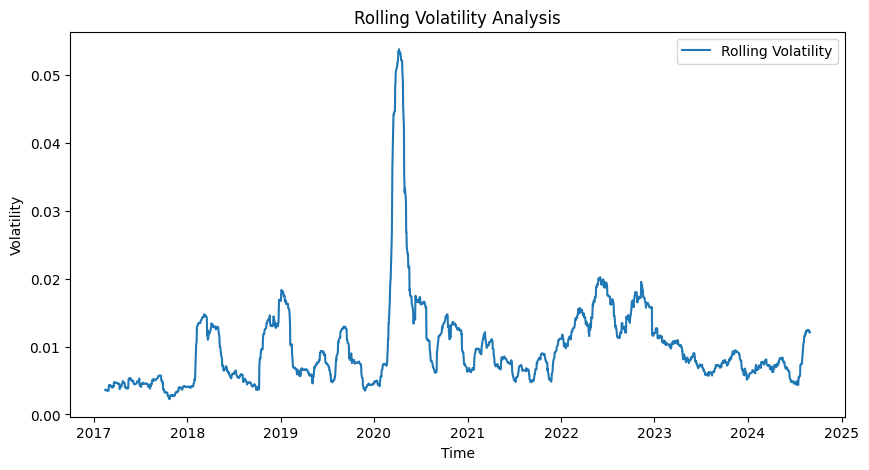

Ticker                        ^GSPC
Date                               
2017-01-03 00:00:00+00:00       NaN
2017-01-04 00:00:00+00:00       NaN
2017-01-05 00:00:00+00:00       NaN
2017-01-06 00:00:00+00:00       NaN
2017-01-09 00:00:00+00:00       NaN
...                             ...
2024-08-26 00:00:00+00:00  0.012415
2024-08-27 00:00:00+00:00  0.012361
2024-08-28 00:00:00+00:00  0.012139
2024-08-29 00:00:00+00:00  0.012047
2024-08-30 00:00:00+00:00  0.012088

[1928 rows x 1 columns]

In [ ]:
calculate_volatility_change(pre_pandemic_data, pandemic_data, post_pandemic_data)
rolling_volatility_analysis(stock_data_cleaned)

## Step 9: Comparative Analysis

In [ ]:
data_periods = {'Pre-Pandemic': pre_pandemic_data, 'Pandemic': pandemic_data, 'Post-Pandemic': post_pandemic_data}
compare_volatility_across_periods(data_periods)
perform_statistical_tests(pre_pandemic_data, pandemic_data)

Volatility comparison across periods: {'Pre-Pandemic': Ticker
^GSPC    0.008325
dtype: float64, 'Pandemic': Ticker
^GSPC    0.019458
dtype: float64, 'Post-Pandemic': Ticker
^GSPC    0.010756
dtype: float64}
T-test results: t-statistic=[-0.94963399], p-value=[0.34250572]


array([0.34250572])

## Step 10: Generate Insights and Visualize Results

In [ ]:
# summary
summary_stats = generate_summary_statistics(stock_data_cleaned)
summary_stats

Summary Statistics: Price     Adj Close        Close         High          Low         Open  \
Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
count   1928.000000  1928.000000  1928.000000  1928.000000  1928.000000   
mean    3582.102335  3582.102335  3601.084768  3560.602364  3581.467719   
std      884.943627   884.943627   889.219281   880.222440   884.552498   
min     2237.399902  2237.399902  2263.879883  2191.860107  2251.570068   
25%     2783.967468  2783.967468  2796.269958  2767.567444  2786.604980   
50%     3508.724976  3508.724976  3527.984985  3485.040039  3507.890015   
75%     4305.465088  4305.465088  4337.257324  4275.587402  4308.707397   
max     5667.200195  5667.200195  5669.669922  5639.020020  5644.089844   

Price         Volume  
Ticker         ^GSPC  
count   1.928000e+03  
mean    4.068725e+09  
std     9.964339e+08  
min     1.296530e+09  
25%     3.459325e+09  
50%     3.856720e+09  
75%     4.432690e+09  
max     9.976520e+09  

Price     Adj Close        Close         High          Low         Open  \
Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
count   1928.000000  1928.000000  1928.000000  1928.000000  1928.000000   
mean    3582.102335  3582.102335  3601.084768  3560.602364  3581.467719   
std      884.943627   884.943627   889.219281   880.222440   884.552498   
min     2237.399902  2237.399902  2263.879883  2191.860107  2251.570068   
25%     2783.967468  2783.967468  2796.269958  2767.567444  2786.604980   
50%     3508.724976  3508.724976  3527.984985  3485.040039  3507.890015   
75%     4305.465088  4305.465088  4337.257324  4275.587402  4308.707397   
max     5667.200195  5667.200195  5669.669922  5639.020020  5644.089844   

Price         Volume  
Ticker         ^GSPC  
count   1.928000e+03  
mean    4.068725e+09  
std     9.964339e+08  
min     1.296530e+09  
25%     3.459325e+09  
50%     3.856720e+09  
75%     4.432690e+09  
max     9.976520e+09

In [ ]:

report = generate_report(stock_data_cleaned, {'ARIMA': arima_model, 'GARCH': garch_model}, insights='COVID-19 significantly increased market volatility.') # also check ARIMA(3, 1, 4)
report


Summary Statistics: Price     Adj Close        Close         High          Low         Open  \
Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
count   1928.000000  1928.000000  1928.000000  1928.000000  1928.000000   
mean    3582.102335  3582.102335  3601.084768  3560.602364  3581.467719   
std      884.943627   884.943627   889.219281   880.222440   884.552498   
min     2237.399902  2237.399902  2263.879883  2191.860107  2251.570068   
25%     2783.967468  2783.967468  2796.269958  2767.567444  2786.604980   
50%     3508.724976  3508.724976  3527.984985  3485.040039  3507.890015   
75%     4305.465088  4305.465088  4337.257324  4275.587402  4308.707397   
max     5667.200195  5667.200195  5669.669922  5639.020020  5644.089844   

Price         Volume  
Ticker         ^GSPC  
count   1.928000e+03  
mean    4.068725e+09  
std     9.964339e+08  
min     1.296530e+09  
25%     3.459325e+09  
50%     3.856720e+09  
75%     4.432690e+09  
max     9.976520e+09  

{'Data Summary': Price     Adj Close        Close         High          Low         Open  \
 Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC        ^GSPC   
 count   1928.000000  1928.000000  1928.000000  1928.000000  1928.000000   
 mean    3582.102335  3582.102335  3601.084768  3560.602364  3581.467719   
 std      884.943627   884.943627   889.219281   880.222440   884.552498   
 min     2237.399902  2237.399902  2263.879883  2191.860107  2251.570068   
 25%     2783.967468  2783.967468  2796.269958  2767.567444  2786.604980   
 50%     3508.724976  3508.724976  3527.984985  3485.040039  3507.890015   
 75%     4305.465088  4305.465088  4337.257324  4275.587402  4308.707397   
 max     5667.200195  5667.200195  5669.669922  5639.020020  5644.089844   
 
 Price         Volume  
 Ticker         ^GSPC  
 count   1.928000e+03  
 mean    4.068725e+09  
 std     9.964339e+08  
 min     1.296530e+09  
 25%     3.459325e+09  
 50%     3.856720e+09  
 75%     4.432690e+09  
 max  

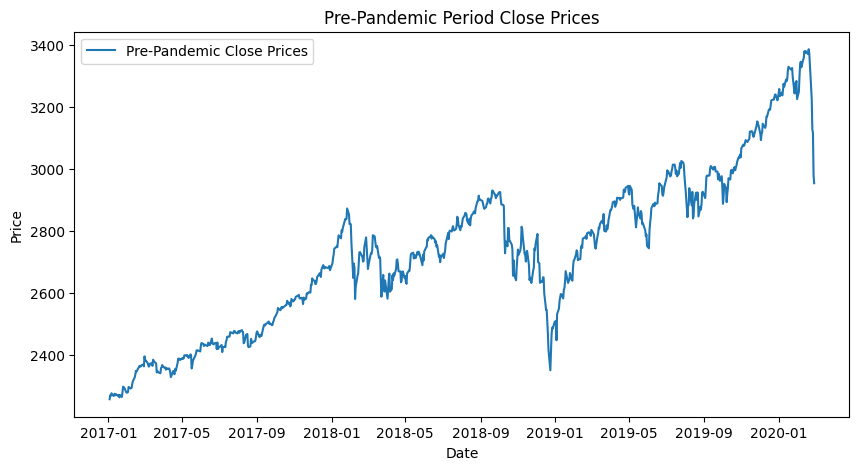

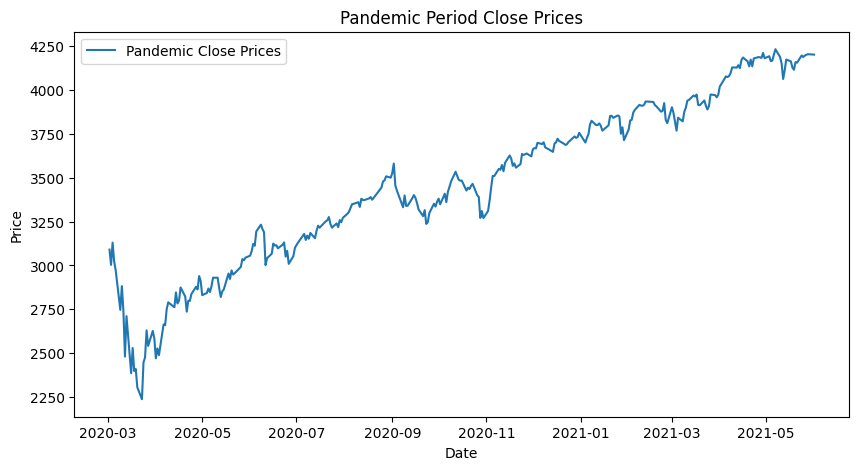

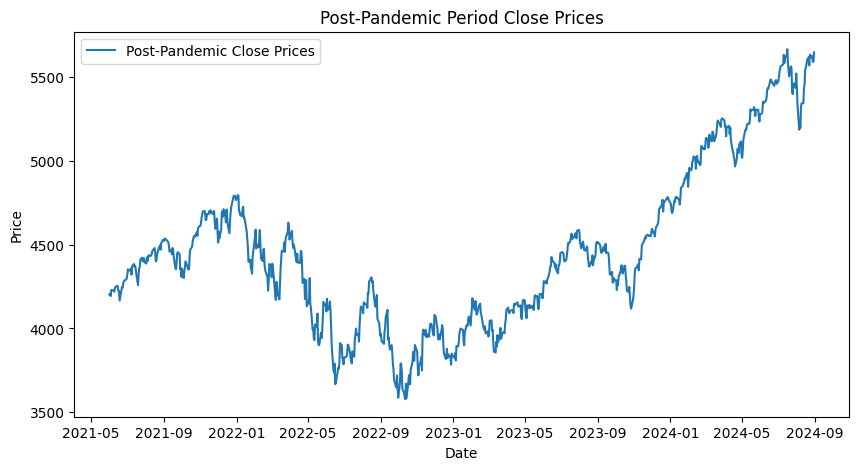

In [ ]:
# Visualize results
visualize_results({'Pre-Pandemic': pre_pandemic_data, 'Pandemic': pandemic_data, 'Post-Pandemic': post_pandemic_data})

# **Dow Jones Industrial Average (DJIA)**

## Step 1: Fetch and clean data
## 1. Data Collection and Preparation

In [ ]:
# Fetch market data for Dow Jones Industrial Average (DJIA)
def fetch_stock_data(start_date, end_date):
    """
    Fetches historical stock data from Yahoo Finance.
    """
    stock_data = yf.download('^DJI', start=start_date, end=end_date)
    stock_data.reset_index(inplace=True)
    return stock_data



## Data cleaning

In [ ]:
def clean_data(df):
    """
    Cleans the data by handling missing values and standardizing formats.
    """
    df.dropna(inplace=True)  # Remove missing values
    df['Date'] = pd.to_datetime(df['Date'])  # Ensure the date column is in datetime format
    df.set_index('Date', inplace=True)  # Set the date column as index
    return df
# Fetch and clean data
start_date = '2017-01-01'
end_date = '2024-09-01'
stock_data = fetch_stock_data(start_date, end_date)
stock_data_cleaned = clean_data(stock_data)

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data

Price                         Adj Close         Close          High  \
Ticker                             ^DJI          ^DJI          ^DJI   
Date                                                                  
2017-01-03 00:00:00+00:00  19881.759766  19881.759766  19938.529297   
2017-01-04 00:00:00+00:00  19942.160156  19942.160156  19956.140625   
2017-01-05 00:00:00+00:00  19899.289062  19899.289062  19948.599609   
2017-01-06 00:00:00+00:00  19963.800781  19963.800781  19999.630859   
2017-01-09 00:00:00+00:00  19887.380859  19887.380859  19943.779297   
...                                 ...           ...           ...   
2024-08-26 00:00:00+00:00  41240.519531  41240.519531  41420.050781   
2024-08-27 00:00:00+00:00  41250.500000  41250.500000  41271.750000   
2024-08-28 00:00:00+00:00  41091.421875  41091.421875  41351.109375   
2024-08-29 00:00:00+00:00  41335.050781  41335.050781  41577.968750   
2024-08-30 00:00:00+00:00  41563.078125  41563.078125  41585.210938   

Price                               Low          Open     Volume  
Ticker                             ^DJI          ^DJI       ^DJI  
Date                                                              
2017-01-03 00:00:00+00:00  19775.929688  19872.859375  339180000  
2017-01-04 00:00:00+00:00  19878.830078  19890.939453  280010000  
2017-01-05 00:00:00+00:00  19811.119141  19924.560547  269920000  
2017-01-06 00:00:00+00:00  19834.080078  19906.960938  277700000  
2017-01-09 00:00:00+00:00  19887.380859  19931.410156  287510000  
...                                 ...           ...        ...  
2024-08-26 00:00:00+00:00  41140.230469  41200.839844  249300000  
2024-08-27 00:00:00+00:00  41109.421875  41186.281250  256160000  
2024-08-28 00:00:00+00:00  40842.289062  41250.171875  272170000  
2024-08-29 00:00:00+00:00  41086.808594  41345.500000  309820000  
2024-08-30 00:00:00+00:00  41145.851562  41366.160156  494900000  

[1928 rows x 6 columns]

In [ ]:
stock_data_cleaned

Price                         Adj Close         Close          High  \
Ticker                             ^DJI          ^DJI          ^DJI   
Date                                                                  
2017-01-03 00:00:00+00:00  19881.759766  19881.759766  19938.529297   
2017-01-04 00:00:00+00:00  19942.160156  19942.160156  19956.140625   
2017-01-05 00:00:00+00:00  19899.289062  19899.289062  19948.599609   
2017-01-06 00:00:00+00:00  19963.800781  19963.800781  19999.630859   
2017-01-09 00:00:00+00:00  19887.380859  19887.380859  19943.779297   
...                                 ...           ...           ...   
2024-08-26 00:00:00+00:00  41240.519531  41240.519531  41420.050781   
2024-08-27 00:00:00+00:00  41250.500000  41250.500000  41271.750000   
2024-08-28 00:00:00+00:00  41091.421875  41091.421875  41351.109375   
2024-08-29 00:00:00+00:00  41335.050781  41335.050781  41577.968750   
2024-08-30 00:00:00+00:00  41563.078125  41563.078125  41585.210938   

Price                               Low          Open     Volume  
Ticker                             ^DJI          ^DJI       ^DJI  
Date                                                              
2017-01-03 00:00:00+00:00  19775.929688  19872.859375  339180000  
2017-01-04 00:00:00+00:00  19878.830078  19890.939453  280010000  
2017-01-05 00:00:00+00:00  19811.119141  19924.560547  269920000  
2017-01-06 00:00:00+00:00  19834.080078  19906.960938  277700000  
2017-01-09 00:00:00+00:00  19887.380859  19931.410156  287510000  
...                                 ...           ...        ...  
2024-08-26 00:00:00+00:00  41140.230469  41200.839844  249300000  
2024-08-27 00:00:00+00:00  41109.421875  41186.281250  256160000  
2024-08-28 00:00:00+00:00  40842.289062  41250.171875  272170000  
2024-08-29 00:00:00+00:00  41086.808594  41345.500000  309820000  
2024-08-30 00:00:00+00:00  41145.851562  41366.160156  494900000  

[1928 rows x 6 columns]

## Step 2: Perform Exploratory Data Analysis (EDA)

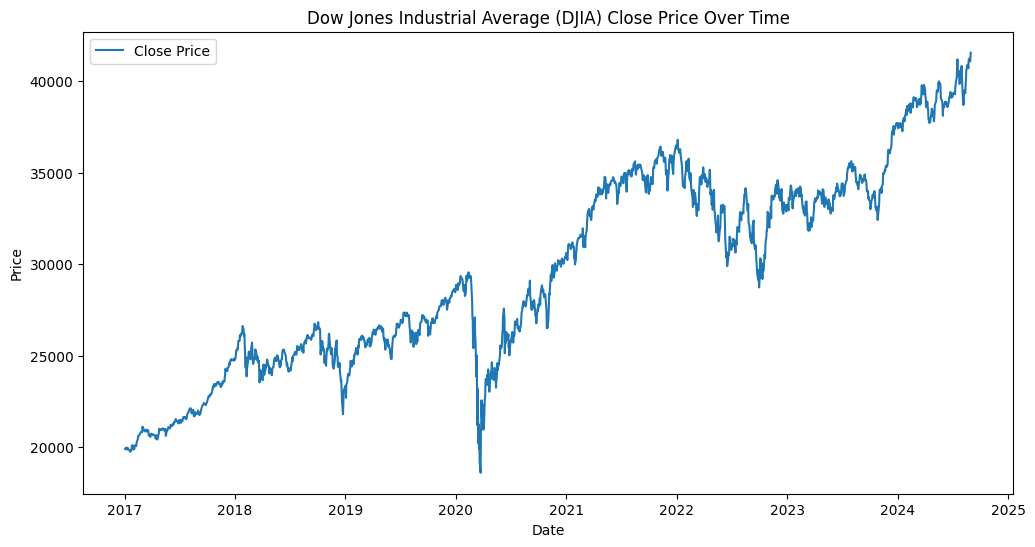

ADF Statistic: -0.9338353272562351
p-value: 0.7766258917336414
Critical Values: 1%, -3.4337657944732745
Critical Values: 5%, -2.863048878223751
Critical Values: 10%, -2.567573268289192


In [ ]:
plot_time_series(stock_data_cleaned, 'Dow Jones Industrial Average (DJIA) Close Price Over Time')
calculate_descriptive_stats(stock_data_cleaned)
stationarity_p_value = test_stationarity(stock_data_cleaned)


## Step 3: Fit ARIMA and GARCH Models

In [ ]:
arima_order = optimize_arima_params(stock_data_cleaned)
arima_model = fit_arima_model(stock_data_cleaned, arima_order)
garch_model = fit_garch_model(stock_data_cleaned)


Best ARIMA order: (2, 1, 2) with AIC: 27572.58715861097
                               SARIMAX Results                                
Dep. Variable:                   ^DJI   No. Observations:                 1928
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -13781.294
Date:                Mon, 18 Nov 2024   AIC                          27572.587
Time:                        05:57:49   BIC                          27600.406
Sample:                             0   HQIC                         27582.821
                               - 1928                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7435      0.020    -85.698      0.000      -1.783      -1.704
ar.L2         -0.8786      0.019    -47.222      0.000      -0.915      -0.

## Step 4: Perform Cross-Validation on ARIMA model

In [ ]:
arima_order = (2, 1, 2)
cross_validate_arima_model(stock_data_cleaned, arima_order)

Cross-validation Mean Squared Error (MSE): nan


nan

## Step 5: Conduct Sensitivity Analysis

In [ ]:
sensitivity_results = sensitivity_analysis_arima(stock_data_cleaned, base_order=arima_order)


Order (1, 1, 2) - AIC: 27640.907951490466, BIC: 27663.162830164125
Order (2, 0, 2) - AIC: 27664.78857590509, BIC: 27698.174006756115
Order (2, 1, 1) - AIC: 27641.855778146673, BIC: 27664.110656820332


## Step 6: Compare Model Performance

In [ ]:
arima_model = fit_arima_model(stock_data_cleaned, arima_order)
garch_model = fit_garch_model(stock_data_cleaned)

                               SARIMAX Results                                
Dep. Variable:                   ^DJI   No. Observations:                 1928
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -13781.294
Date:                Mon, 18 Nov 2024   AIC                          27572.587
Time:                        05:57:58   BIC                          27600.406
Sample:                             0   HQIC                         27582.821
                               - 1928                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7435      0.020    -85.698      0.000      -1.783      -1.704
ar.L2         -0.8786      0.019    -47.222      0.000      -0.915      -0.842
ma.L1          1.6598      0.026     64.342      0.0

## Step 7: Segment data for comparative analysis
We will segment the data into pre-pandemic, pandemic, and post-pandemic periods and compare volatility

In [ ]:

pre_pandemic_data = segment_data_by_period(stock_data_cleaned, '2017-01-01', '2020-03-01')
pandemic_data = segment_data_by_period(stock_data_cleaned, '2020-03-01', '2021-06-01')
post_pandemic_data = segment_data_by_period(stock_data_cleaned, '2021-06-01', '2024-09-01')


## Step 8: Quantify Volatility Changes
Quantify changes in volatility across periods

Pre-pandemic volatility: Ticker
^DJI    0.008584
dtype: float64
Pandemic volatility: Ticker
^DJI    0.020526
dtype: float64
Post-pandemic volatility: Ticker
^DJI    0.009165
dtype: float64


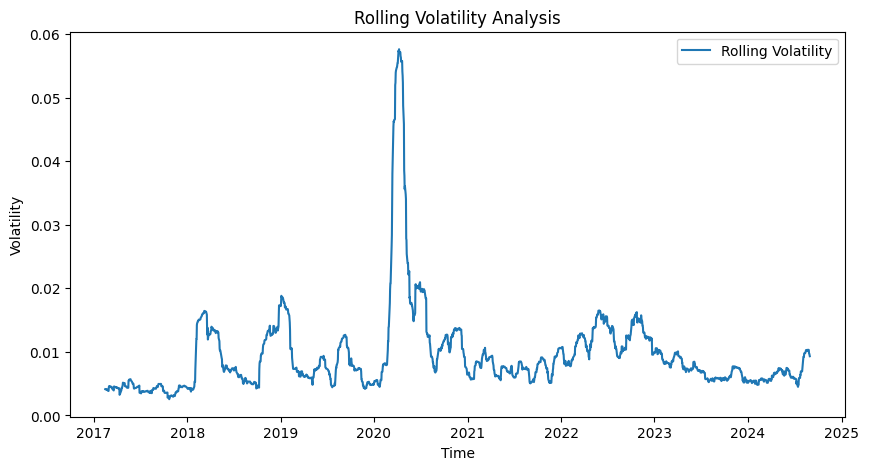

Ticker                         ^DJI
Date                               
2017-01-03 00:00:00+00:00       NaN
2017-01-04 00:00:00+00:00       NaN
2017-01-05 00:00:00+00:00       NaN
2017-01-06 00:00:00+00:00       NaN
2017-01-09 00:00:00+00:00       NaN
...                             ...
2024-08-26 00:00:00+00:00  0.010310
2024-08-27 00:00:00+00:00  0.009761
2024-08-28 00:00:00+00:00  0.009729
2024-08-29 00:00:00+00:00  0.009473
2024-08-30 00:00:00+00:00  0.009325

[1928 rows x 1 columns]

In [ ]:
calculate_volatility_change(pre_pandemic_data, pandemic_data, post_pandemic_data)
rolling_volatility_analysis(stock_data_cleaned)

## Step 9: Comparative Analysis

In [ ]:
data_periods = {'Pre-Pandemic': pre_pandemic_data, 'Pandemic': pandemic_data, 'Post-Pandemic': post_pandemic_data}
compare_volatility_across_periods(data_periods)
perform_statistical_tests(pre_pandemic_data, pandemic_data)

Volatility comparison across periods: {'Pre-Pandemic': Ticker
^DJI    0.008584
dtype: float64, 'Pandemic': Ticker
^DJI    0.020526
dtype: float64, 'Post-Pandemic': Ticker
^DJI    0.009165
dtype: float64}
T-test results: t-statistic=[-0.78478169], p-value=[0.43274964]


array([0.43274964])

## Step 10: Generate Insights and Visualize Results

In [ ]:
# summary
summary_stats = generate_summary_statistics(stock_data_cleaned)
summary_stats

Summary Statistics: Price      Adj Close         Close          High           Low          Open  \
Ticker          ^DJI          ^DJI          ^DJI          ^DJI          ^DJI   
count    1928.000000   1928.000000   1928.000000   1928.000000   1928.000000   
mean    29632.529870  29632.529870  29789.387917  29459.070922  29628.024863   
std      5458.882033   5458.882033   5477.691165   5437.342880   5455.839679   
min     18591.929688  18591.929688  19121.009766  18213.650391  19028.359375   
25%     25200.991699  25200.991699  25359.000488  25009.676758  25208.966797   
50%     29215.415039  29215.415039  29362.114258  29005.629883  29231.150391   
75%     34123.829102  34123.829102  34331.914062  33905.073242  34112.510742   
max     41563.078125  41563.078125  41585.210938  41145.851562  41366.160156   

Price         Volume  
Ticker          ^DJI  
count   1.928000e+03  
mean    3.419290e+08  
std     1.014330e+08  
min     8.615000e+07  
25%     2.794950e+08  
50%     3.222100e+

Price      Adj Close         Close          High           Low          Open  \
Ticker          ^DJI          ^DJI          ^DJI          ^DJI          ^DJI   
count    1928.000000   1928.000000   1928.000000   1928.000000   1928.000000   
mean    29632.529870  29632.529870  29789.387917  29459.070922  29628.024863   
std      5458.882033   5458.882033   5477.691165   5437.342880   5455.839679   
min     18591.929688  18591.929688  19121.009766  18213.650391  19028.359375   
25%     25200.991699  25200.991699  25359.000488  25009.676758  25208.966797   
50%     29215.415039  29215.415039  29362.114258  29005.629883  29231.150391   
75%     34123.829102  34123.829102  34331.914062  33905.073242  34112.510742   
max     41563.078125  41563.078125  41585.210938  41145.851562  41366.160156   

Price         Volume  
Ticker          ^DJI  
count   1.928000e+03  
mean    3.419290e+08  
std     1.014330e+08  
min     8.615000e+07  
25%     2.794950e+08  
50%     3.222100e+08  
75%     3.799950e+08  
max     9.159900e+08

In [ ]:

report = generate_report(stock_data_cleaned, {'ARIMA': arima_model, 'GARCH': garch_model}, insights='COVID-19 significantly increased market volatility.') # also check ARIMA(3, 1, 4)
report


Summary Statistics: Price      Adj Close         Close          High           Low          Open  \
Ticker          ^DJI          ^DJI          ^DJI          ^DJI          ^DJI   
count    1928.000000   1928.000000   1928.000000   1928.000000   1928.000000   
mean    29632.529870  29632.529870  29789.387917  29459.070922  29628.024863   
std      5458.882033   5458.882033   5477.691165   5437.342880   5455.839679   
min     18591.929688  18591.929688  19121.009766  18213.650391  19028.359375   
25%     25200.991699  25200.991699  25359.000488  25009.676758  25208.966797   
50%     29215.415039  29215.415039  29362.114258  29005.629883  29231.150391   
75%     34123.829102  34123.829102  34331.914062  33905.073242  34112.510742   
max     41563.078125  41563.078125  41585.210938  41145.851562  41366.160156   

Price         Volume  
Ticker          ^DJI  
count   1.928000e+03  
mean    3.419290e+08  
std     1.014330e+08  
min     8.615000e+07  
25%     2.794950e+08  
50%     3.222100e+

{'Data Summary': Price      Adj Close         Close          High           Low          Open  \
 Ticker          ^DJI          ^DJI          ^DJI          ^DJI          ^DJI   
 count    1928.000000   1928.000000   1928.000000   1928.000000   1928.000000   
 mean    29632.529870  29632.529870  29789.387917  29459.070922  29628.024863   
 std      5458.882033   5458.882033   5477.691165   5437.342880   5455.839679   
 min     18591.929688  18591.929688  19121.009766  18213.650391  19028.359375   
 25%     25200.991699  25200.991699  25359.000488  25009.676758  25208.966797   
 50%     29215.415039  29215.415039  29362.114258  29005.629883  29231.150391   
 75%     34123.829102  34123.829102  34331.914062  33905.073242  34112.510742   
 max     41563.078125  41563.078125  41585.210938  41145.851562  41366.160156   
 
 Price         Volume  
 Ticker          ^DJI  
 count   1.928000e+03  
 mean    3.419290e+08  
 std     1.014330e+08  
 min     8.615000e+07  
 25%     2.794950e+08  
 50%

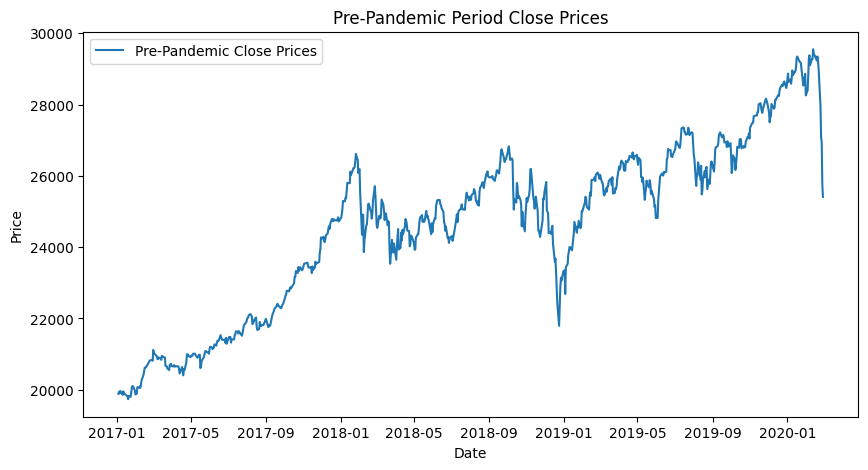

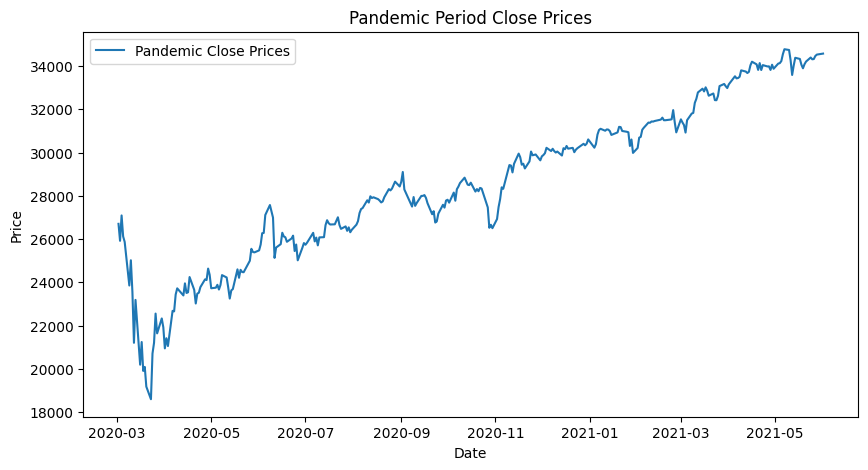

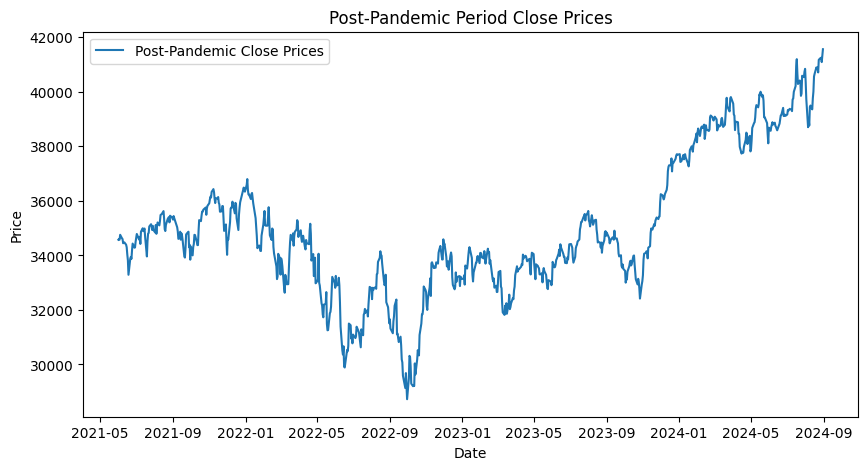

In [ ]:
# Visualize results
visualize_results({'Pre-Pandemic': pre_pandemic_data, 'Pandemic': pandemic_data, 'Post-Pandemic': post_pandemic_data})